# Proyecto de Machine Learning: Predicción de Cálculos Biliares (Gallstone)

**Autor:** Alessandro Ledesma  
**Fecha:** 23 de Junio de 2025  
**Dataset:** Gallstone Dataset

## Objetivo del Proyecto
Este proyecto implementa modelos de machine learning para la predicción de cálculos biliares utilizando características clínicas de pacientes. Se aplicarán técnicas avanzadas incluyendo:

- XGBoost Classifier
- Redes Neuronales
- Técnicas de balanceo SMOTE
- Selección de características con Algoritmos Genéticos
- Análisis ético en aplicaciones médicas

In [1]:
# === IMPORTACIÓN DE LIBRERÍAS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Configurar pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Definir ruta del archivo
data_path = "/Users/alessandroledesma/Desktop/proyecto-machine-learning/data/gallstone.csv"

try:
    # Cargar dataset (separado por punto y coma)
    df = pd.read_csv(data_path, sep=';', encoding='utf-8')
    print(f"Dataset cargado exitosamente")
    print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    
except FileNotFoundError:
    print("Error: Archivo no encontrado")
    
    # Intentar ruta alternativa
    alt_path = "/Users/alessandroledesma/Downloads/gallstone.csv"
    try:
        df = pd.read_csv(alt_path, sep=';', encoding='utf-8')
        print(f"Dataset cargado desde Downloads")
        print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    except FileNotFoundError:
        print("Dataset no encontrado en ninguna ubicación")
        raise
        
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    raise

# Mostrar información básica
print("\n=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Variables: {list(df.columns)}")
print(f"\nTipos de datos:")
print(df.dtypes)

Dataset cargado exitosamente
Dimensiones: 319 filas × 39 columnas

=== INFORMACIÓN BÁSICA DEL DATASET ===
Variables: ['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rat

In [3]:
# === ANÁLISIS EXPLORATORIO INICIAL ===
print("ANÁLISIS EXPLORATORIO INICIAL")
print("=" * 50)

# Vista previa del dataset
print("\nPRIMERAS 5 FILAS:")
display(df.head())

print("\nINFORMACIÓN GENERAL:")
print(df.info())

print("\nESTADÍSTICAS DESCRIPTIVAS:")
display(df.describe())

ANÁLISIS EXPLORATORIO INICIAL

PRIMERAS 5 FILAS:


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),Total Body Water (TBW),Extracellular Water (ECW),Intracellular Water (ICW),Extracellular Fluid/Total Body Water (ECF/TBW),Total Body Fat Ratio (TBFR) (%),Lean Mass (LM) (%),Body Protein Content (Protein) (%),Visceral Fat Rating (VFR),Bone Mass (BM),Muscle Mass (MM),Obesity (%),Total Fat Content (TFC),Visceral Fat Area (VFA),Visceral Muscle Area (VMA) (Kg),Hepatic Fat Accumulation (HFA),Glucose,Total Cholesterol (TC),Low Density Lipoprotein (LDL),High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,27.1,52.9,21.2,31.7,40.0,19.2,80.84,18.88,9,3.7,71.4,23.4,17.8,10.6,39.7,0,102.0,250.0,175.0,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,30.5,43.1,19.5,23.6,45.0,32.8,67.20,16.68,15,3.2,60.3,38.8,31.0,18.4,32.7,0,94.0,172.0,108.0,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,31.2,47.2,20.1,27.1,43.0,27.3,72.67,16.35,15,3.3,62.9,41.7,24.9,16.2,34.0,0,103.0,179.0,124.0,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,24.0,41.4,17.0,24.4,41.0,15.8,84.19,16.90,6,2.9,54.1,9.0,10.7,6.5,29.2,1,69.0,173.0,73.0,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,28.3,51.4,20.0,31.4,39.0,20.0,80.02,16.81,8,3.5,68.2,28.6,17.9,10.4,37.4,2,109.0,205.0,154.0,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6



INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight               

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),Total Body Water (TBW),Extracellular Water (ECW),Intracellular Water (ICW),Extracellular Fluid/Total Body Water (ECF/TBW),Total Body Fat Ratio (TBFR) (%),Lean Mass (LM) (%),Body Protein Content (Protein) (%),Visceral Fat Rating (VFR),Bone Mass (BM),Muscle Mass (MM),Obesity (%),Total Fat Content (TFC),Visceral Fat Area (VFA),Visceral Muscle Area (VMA) (Kg),Hepatic Fat Accumulation (HFA),Glucose,Total Cholesterol (TC),Low Density Lipoprotein (LDL),High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,28.877116,40.587774,17.071160,23.634483,42.212038,28.274984,71.638245,15.938809,9.078370,2.803292,54.273041,35.850125,23.487774,12.171599,30.403448,1.150470,108.688715,203.495298,126.652351,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,5.313707,7.930235,3.161857,5.349332,3.244470,8.444417,8.437598,2.334744,4.332501,0.509467,10.603833,109.799718,9.607607,5.262178,4.460530,1.059217,44.848714,45.758501,38.541175,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,17.400000,13.000000,9.000000,13.800000,29.230000,6.300000,48.990000,5.560000,1.000000,1.400000,4.700000,0.400000,3.100000,0.900000,18.900000,0.000000,69.000000,60.000000,11.000000,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,25.250000,34.200000,14.800000,19.300000,40.075000,22.025000,65.165000,14.465000,6.000000,2.400000,45.800000,13.900000,17.000000,8.570000,27.250000,0.000000,92.000000,172.000000,100.500000,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,28.300000,39.800000,17.100000,23.000000,42.000000,27.820000,72.110000,15.870000,9.000000,2.800000,53.900000,25.600000,22.600000,11.590000,30.408108,1.000000,98.000000,198.000000,122.000000,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,31.850000,47.000000,19.400000,27.550000,44.000000,34.810000,77.850000,17.430000,12.000000,3.200000,62.600000,41.750000,28.550000,15.100000,33.800000,2.000000,109.000000,233.000000,151.000000,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,49.700000,66.200000,27.800000,57.100000,52.000000,50.920000,93.670000,24.810000,31.000000,4.000000,78.800000,1954.000000,62.500000,41.000000,41.100000,4.000000,575.000000,360.000000,293.000000,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [4]:
# === ANÁLISIS DE VALORES FALTANTES ===
print("\nVALORES FALTANTES:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    missing_df = pd.DataFrame({
        'Variable': missing_values.index,
        'Valores_Faltantes': missing_values.values,
        'Porcentaje': (missing_values.values / len(df)) * 100
    }).sort_values('Valores_Faltantes', ascending=False)
    display(missing_df[missing_df['Valores_Faltantes'] > 0])
else:
    print("No hay valores faltantes en el dataset")

# Análisis de la variable objetivo
print("\nANÁLISIS DE LA VARIABLE OBJETIVO:")
target_col = 'Gallstone Status'
target_dist = df[target_col].value_counts()
target_pct = df[target_col].value_counts(normalize=True) * 100

print(f"Distribución de {target_col}:")
for val, count, pct in zip(target_dist.index, target_dist.values, target_pct.values):
    label = "Con cálculos" if val == 1 else "Sin cálculos"
    print(f"  {label} ({val}): {count} casos ({pct:.1f}%)")

# Verificar balance de clases
minority_class = target_dist.min()
majority_class = target_dist.max()
imbalance_ratio = majority_class / minority_class
print(f"\nBalance de clases:")
print(f"  Ratio de desbalance: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print(f"Dataset desbalanceado - Se aplicará SMOTE")
else:
    print(f"Dataset relativamente balanceado")


VALORES FALTANTES:
No hay valores faltantes en el dataset

ANÁLISIS DE LA VARIABLE OBJETIVO:
Distribución de Gallstone Status:
  Sin cálculos (0): 161 casos (50.5%)
  Con cálculos (1): 158 casos (49.5%)

Balance de clases:
  Ratio de desbalance: 1.02:1
Dataset relativamente balanceado


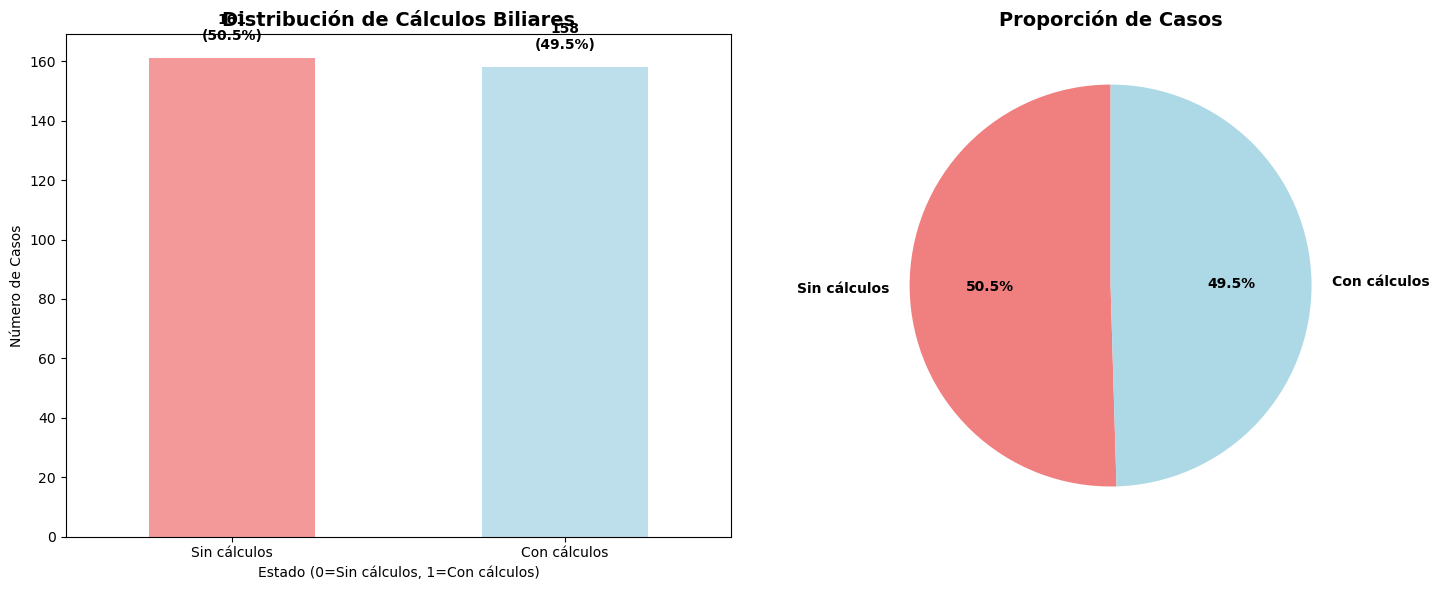

In [5]:
# === VISUALIZACIÓN DE LA VARIABLE OBJETIVO ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
target_dist.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'], alpha=0.8)
ax1.set_title('Distribución de Cálculos Biliares', fontsize=14, fontweight='bold')
ax1.set_xlabel('Estado (0=Sin cálculos, 1=Con cálculos)')
ax1.set_ylabel('Número de Casos')
ax1.set_xticklabels(['Sin cálculos', 'Con cálculos'], rotation=0)

# Agregar valores en las barras
for i, v in enumerate(target_dist.values):
    ax1.text(i, v + 5, f'{v}\n({target_pct.iloc[i]:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
ax2.pie(target_dist.values, labels=['Sin cálculos', 'Con cálculos'], 
       autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], 
       startangle=90, textprops={'fontweight': 'bold'})
ax2.set_title('Proporción de Casos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Análisis de Correlaciones y Características

Analizamos las correlaciones entre variables y identificamos los factores más relacionados con la presencia de cálculos biliares.

In [6]:
# === ANÁLISIS DE CORRELACIONES ===
print("ANÁLISIS DE CORRELACIONES")
print("=" * 40)

# Preparar datos numéricos
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas encontradas: {len(numeric_cols)}")

# Calcular matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Correlaciones con la variable objetivo
target_corr = correlation_matrix['Gallstone Status'].abs().sort_values(ascending=False)
target_corr = target_corr.drop('Gallstone Status')  # Remover auto-correlación

print(f"\nTOP 10 CORRELACIONES CON VARIABLE OBJETIVO:")
print("-" * 60)
for i, (var, corr) in enumerate(target_corr.head(10).items(), 1):
    direction = "positiva" if correlation_matrix.loc['Gallstone Status', var] > 0 else "negativa"
    print(f"{i:2d}. {var:<35} | {corr:.3f} ({direction})")

# Identificar correlaciones altas entre variables
print(f"\nCORRELACIONES ALTAS ENTRE VARIABLES (>0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], corr_val))

if high_corr_pairs:
    for feat1, feat2, corr_val in high_corr_pairs[:5]:  # Mostrar solo las primeras 5
        print(f"  • {feat1} - {feat2}: {corr_val:.3f}")
else:
    print("No se encontraron correlaciones muy altas")

ANÁLISIS DE CORRELACIONES
Variables numéricas encontradas: 39

TOP 10 CORRELACIONES CON VARIABLE OBJETIVO:
------------------------------------------------------------
 1. Vitamin D                           | 0.355 (negativa)
 2. C-Reactive Protein (CRP)            | 0.282 (positiva)
 3. Lean Mass (LM) (%)                  | 0.226 (negativa)
 4. Total Body Fat Ratio (TBFR) (%)     | 0.225 (positiva)
 5. Bone Mass (BM)                      | 0.217 (negativa)
 6. Hemoglobin (HGB)                    | 0.197 (negativa)
 7. Extracellular Water (ECW)           | 0.178 (negativa)
 8. Total Fat Content (TFC)             | 0.170 (positiva)
 9. Extracellular Fluid/Total Body Water (ECF/TBW) | 0.170 (negativa)
10. Hyperlipidemia                      | 0.162 (positiva)

CORRELACIONES ALTAS ENTRE VARIABLES (>0.8):
  • Weight - Visceral Fat Area (VFA): 0.882
  • Body Mass Index (BMI) - Total Fat Content (TFC): 0.903
  • Body Mass Index (BMI) - Visceral Fat Area (VFA): 0.850
  • Total Body Water (TB


Generando matriz de correlación visual...


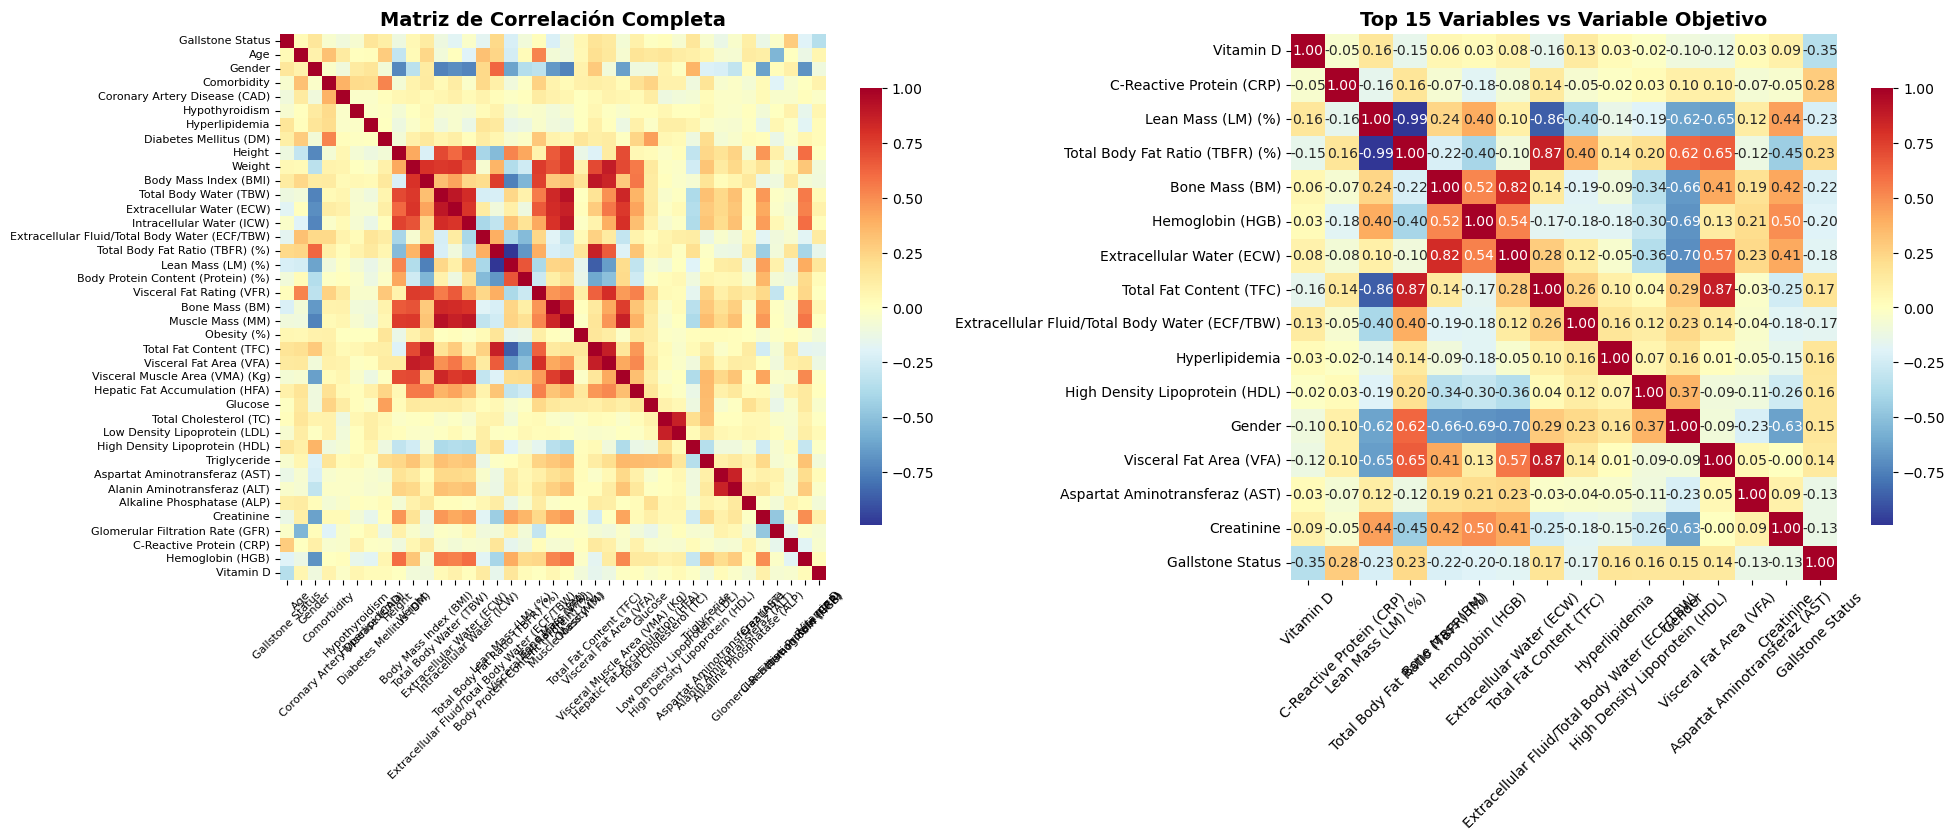

In [7]:
# === MATRIZ DE CORRELACIÓN VISUAL ===
print("\nGenerando matriz de correlación visual...")

# Matriz de correlación completa (puede ser grande)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Matriz completa (más pequeña para legibilidad)
sns.heatmap(correlation_matrix, cmap='RdYlBu_r', center=0, 
           square=True, cbar_kws={"shrink": .8}, ax=axes[0])
axes[0].set_title('Matriz de Correlación Completa', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0].tick_params(axis='y', rotation=0, labelsize=8)

# Correlaciones más importantes con variable objetivo
top_features = target_corr.head(15).index.tolist() + ['Gallstone Status']
corr_subset = correlation_matrix.loc[top_features, top_features]

sns.heatmap(corr_subset, annot=True, cmap='RdYlBu_r', center=0, 
           square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=axes[1])
axes[1].set_title('Top 15 Variables vs Variable Objetivo', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', rotation=0, labelsize=10)

plt.tight_layout()
plt.show()

In [8]:
# === ANÁLISIS POR GÉNERO Y CARACTERÍSTICAS DEMOGRÁFICAS ===
print("\nANÁLISIS POR GÉNERO:")
print("=" * 30)

# Distribución por género
gender_dist = df['Gender'].value_counts()
print(f"Distribución por género:")
for val, count in zip(gender_dist.index, gender_dist.values):
    label = "Masculino" if val == 1 else "Femenino"
    print(f"  {label} ({val}): {count} casos ({count/len(df)*100:.1f}%)")

# Análisis de gallstone por género
print(f"\nRelación Género vs Gallstone:")
gender_gallstone = pd.crosstab(df['Gender'], df['Gallstone Status'], margins=True)
print(gender_gallstone)

# Porcentajes por género
print(f"\nPorcentajes de gallstone por género:")
for gender in [0, 1]:
    gender_label = "Femenino" if gender == 0 else "Masculino"
    subset = df[df['Gender'] == gender]
    gallstone_pct = subset['Gallstone Status'].mean() * 100
    print(f"  {gender_label}: {gallstone_pct:.1f}% con gallstone")

# Análisis de edad
print(f"\n🎂 ANÁLISIS POR EDAD:")
print(f"Estadísticas de edad:")
print(f"  Edad promedio: {df['Age'].mean():.1f} años")
print(f"  Rango de edad: {df['Age'].min()}-{df['Age'].max()} años")
print(f"  Mediana: {df['Age'].median():.1f} años")

# Edad por grupos de gallstone
print(f"\nEdad promedio por grupo:")
for status in [0, 1]:
    label = "Sin gallstone" if status == 0 else "Con gallstone"
    age_mean = df[df['Gallstone Status'] == status]['Age'].mean()
    print(f"  {label}: {age_mean:.1f} años")


ANÁLISIS POR GÉNERO:
Distribución por género:
  Femenino (0): 162 casos (50.8%)
  Masculino (1): 157 casos (49.2%)

Relación Género vs Gallstone:
Gallstone Status    0    1  All
Gender                         
0                  94   68  162
1                  67   90  157
All               161  158  319

Porcentajes de gallstone por género:
  Femenino: 42.0% con gallstone
  Masculino: 57.3% con gallstone

🎂 ANÁLISIS POR EDAD:
Estadísticas de edad:
  Edad promedio: 48.1 años
  Rango de edad: 20-96 años
  Mediana: 49.0 años

Edad promedio por grupo:
  Sin gallstone: 47.6 años
  Con gallstone: 48.5 años


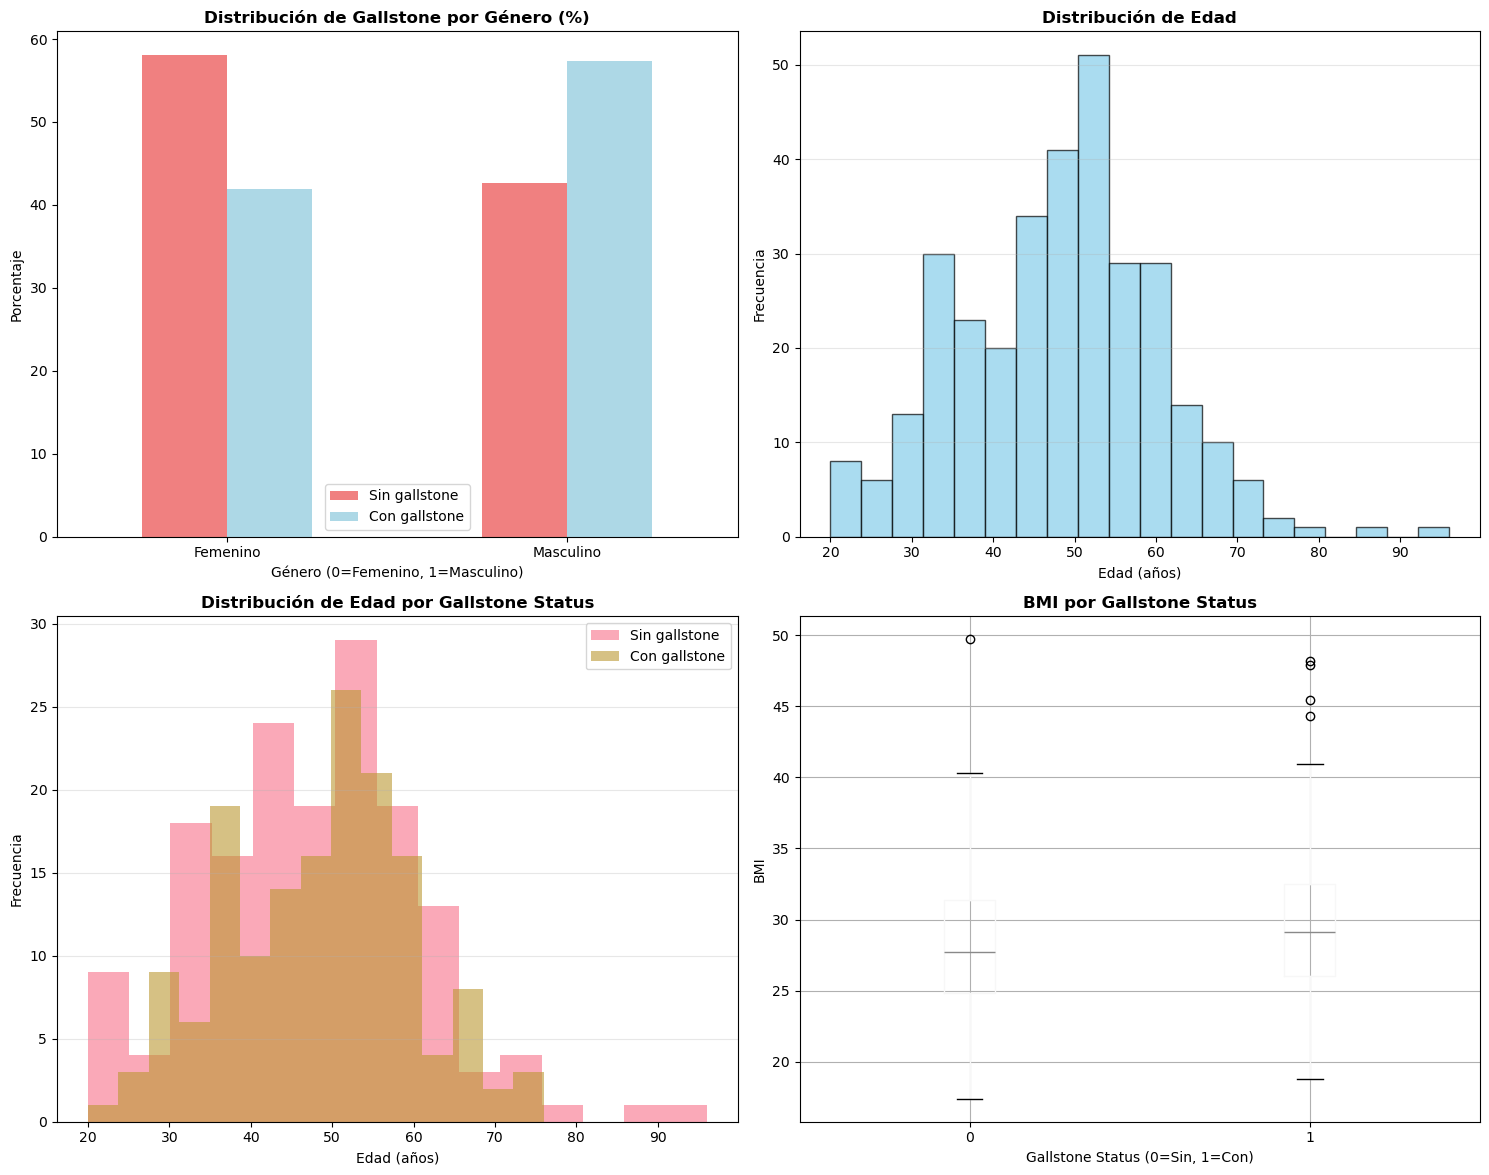

In [9]:
# === VISUALIZACIONES DEMOGRÁFICAS ===
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribución por género y gallstone
gender_gallstone_pct = pd.crosstab(df['Gender'], df['Gallstone Status'], normalize='index') * 100
gender_gallstone_pct.plot(kind='bar', ax=axes[0,0], color=['lightcoral', 'lightblue'])
axes[0,0].set_title('Distribución de Gallstone por Género (%)', fontweight='bold')
axes[0,0].set_xlabel('Género (0=Femenino, 1=Masculino)')
axes[0,0].set_ylabel('Porcentaje')
axes[0,0].legend(['Sin gallstone', 'Con gallstone'])
axes[0,0].set_xticklabels(['Femenino', 'Masculino'], rotation=0)

# 2. Distribución de edad
axes[0,1].hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_title('Distribución de Edad', fontweight='bold')
axes[0,1].set_xlabel('Edad (años)')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(axis='y', alpha=0.3)

# 3. Edad por gallstone status
for status in [0, 1]:
    subset = df[df['Gallstone Status'] == status]['Age']
    label = 'Sin gallstone' if status == 0 else 'Con gallstone'
    axes[1,0].hist(subset, bins=15, alpha=0.6, label=label)
axes[1,0].set_title('Distribución de Edad por Gallstone Status', fontweight='bold')
axes[1,0].set_xlabel('Edad (años)')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].legend()
axes[1,0].grid(axis='y', alpha=0.3)

# 4. BMI por gallstone status
df.boxplot(column='Body Mass Index (BMI)', by='Gallstone Status', ax=axes[1,1])
axes[1,1].set_title('BMI por Gallstone Status', fontweight='bold')
axes[1,1].set_xlabel('Gallstone Status (0=Sin, 1=Con)')
axes[1,1].set_ylabel('BMI')

plt.suptitle('')  # Remover título automático
plt.tight_layout()
plt.show()

## 3. Análisis de Distribuciones de Variables Clave

Examinamos las distribuciones de las variables más correlacionadas con gallstone y identificamos patrones.

ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CLAVE
Analizando las 8 variables más correlacionadas:
  1. Vitamin D: -0.355
  2. C-Reactive Protein (CRP): 0.282
  3. Lean Mass (LM) (%): -0.226
  4. Total Body Fat Ratio (TBFR) (%): 0.225
  5. Bone Mass (BM): -0.217
  6. Hemoglobin (HGB): -0.197
  7. Extracellular Water (ECW): -0.178
  8. Total Fat Content (TFC): 0.170


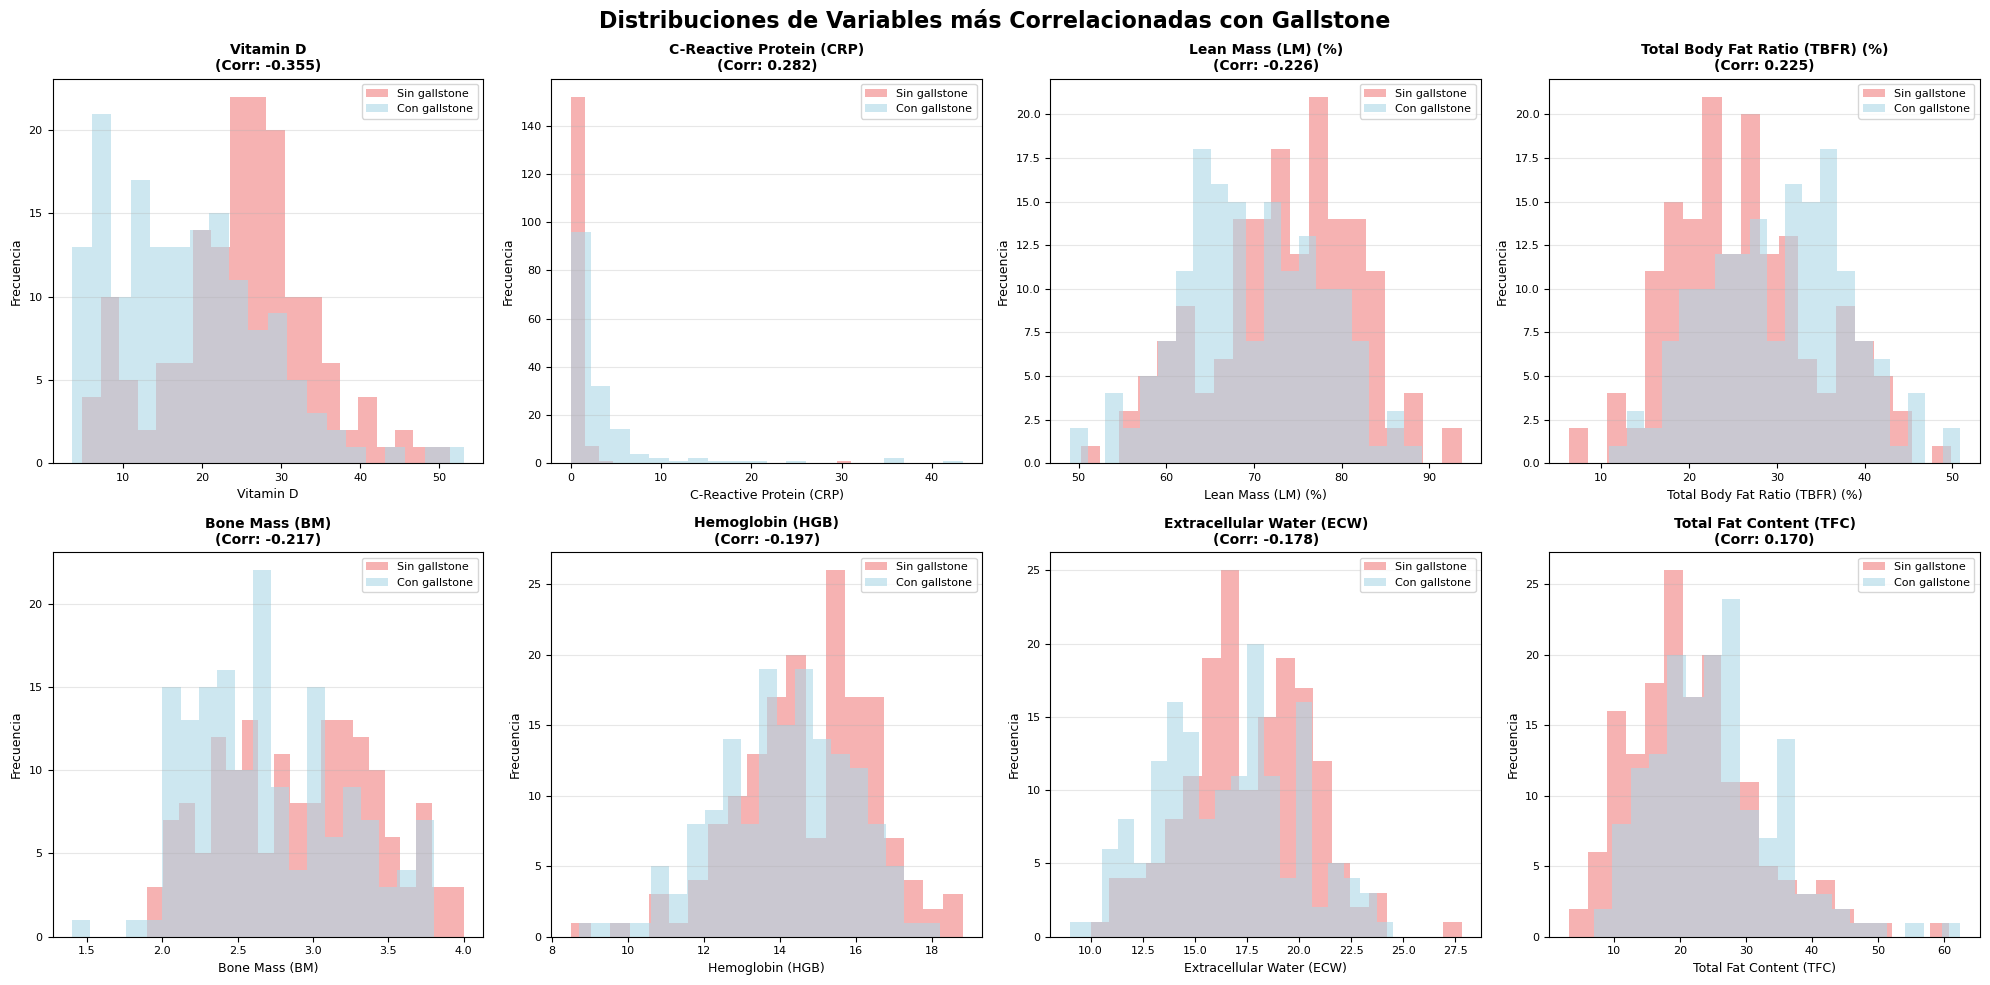

In [10]:
# === ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CLAVE ===
print("ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CLAVE")
print("=" * 55)

# Seleccionar top variables correlacionadas
top_vars = target_corr.head(8).index.tolist()
print(f"Analizando las 8 variables más correlacionadas:")
for i, var in enumerate(top_vars, 1):
    corr_val = correlation_matrix.loc['Gallstone Status', var]
    print(f"  {i}. {var}: {corr_val:.3f}")

# Visualizar distribuciones
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, var in enumerate(top_vars):
    # Histograma por clase
    for status in [0, 1]:
        subset = df[df['Gallstone Status'] == status][var]
        label = 'Sin gallstone' if status == 0 else 'Con gallstone'
        color = 'lightcoral' if status == 0 else 'lightblue'
        axes[i].hist(subset, bins=20, alpha=0.6, label=label, color=color)
    
    axes[i].set_title(f'{var}\n(Corr: {correlation_matrix.loc["Gallstone Status", var]:.3f})', 
                     fontsize=10, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=9)
    axes[i].set_ylabel('Frecuencia', fontsize=9)
    axes[i].legend(fontsize=8)
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].tick_params(axis='both', labelsize=8)

plt.suptitle('Distribuciones de Variables más Correlacionadas con Gallstone', 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


BOXPLOTS COMPARATIVOS


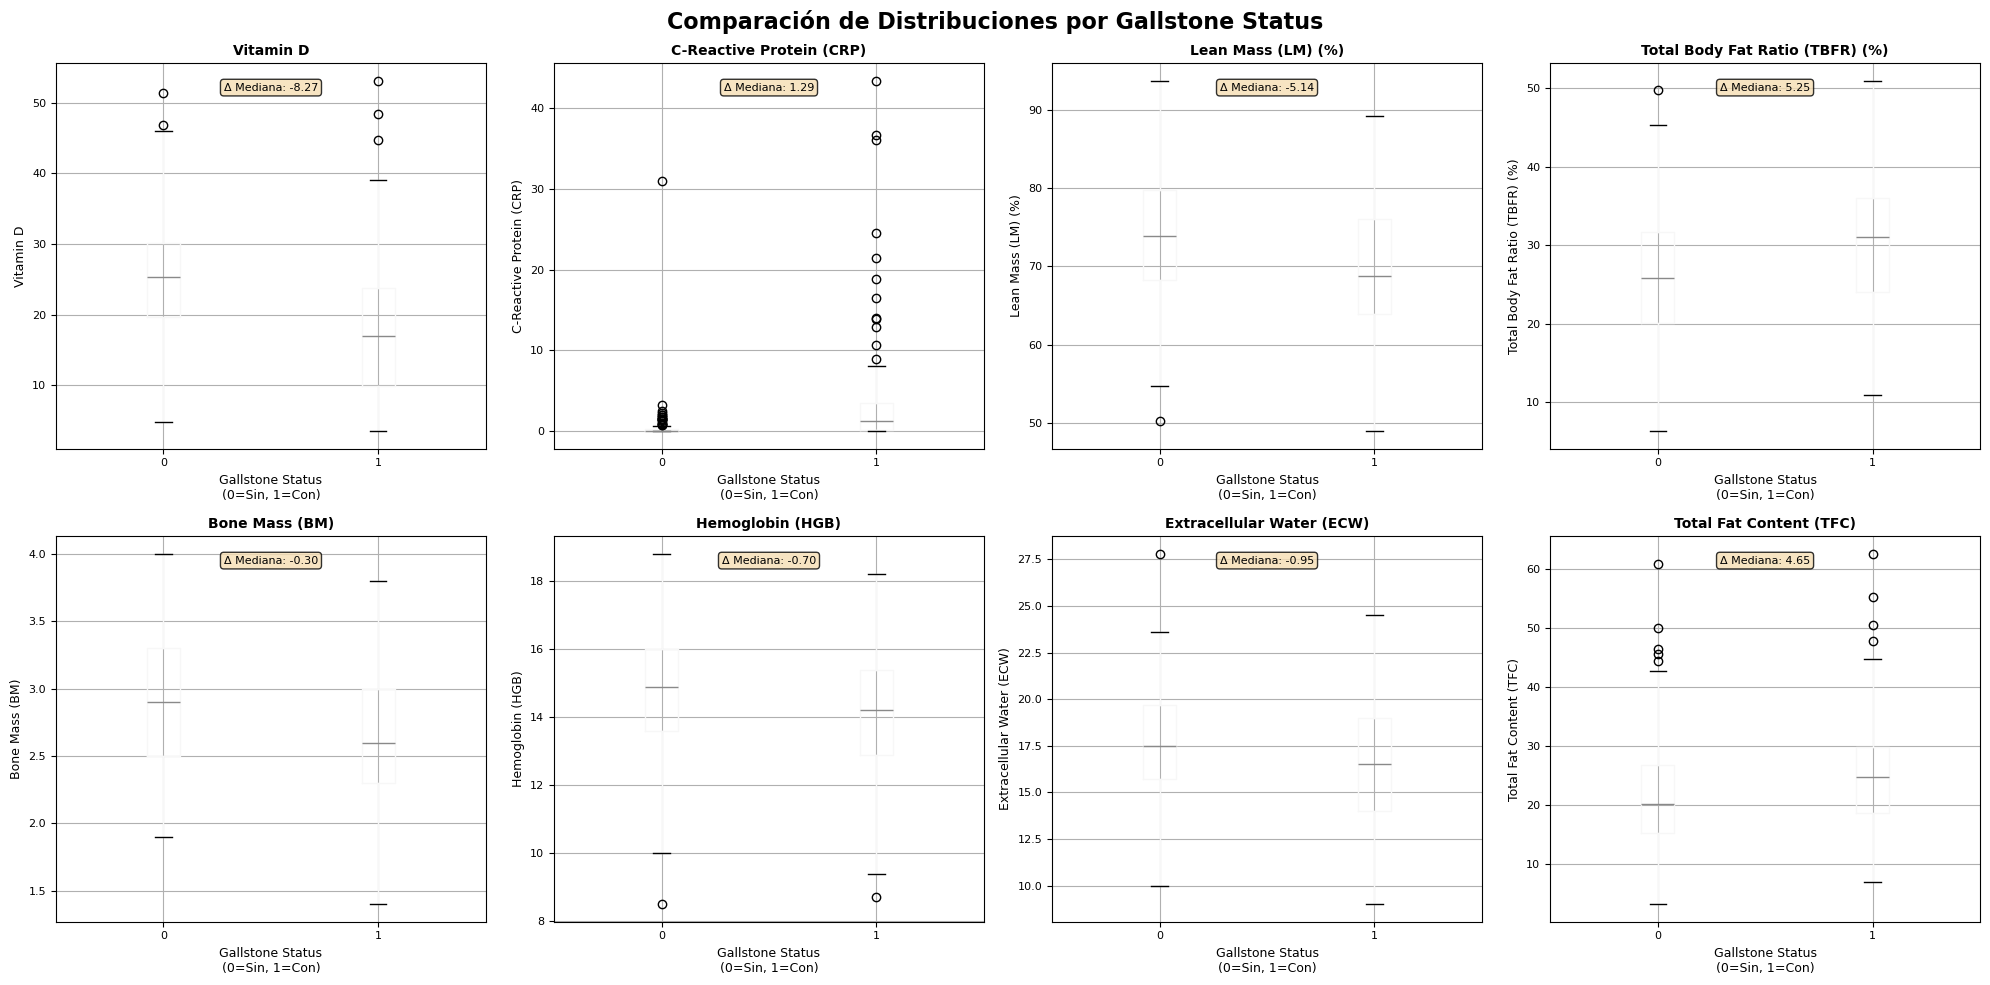


RESUMEN ESTADÍSTICO DE VARIABLES CLAVE:
--------------------------------------------------

Vitamin D:
  Sin gallstone: Media=24.90, Mediana=25.27, SD=9.12
  Con gallstone: Media=17.83, Mediana=17.00, SD=9.58

C-Reactive Protein (CRP):
  Sin gallstone: Media=0.46, Mediana=0.00, SD=2.48
  Con gallstone: Media=3.27, Mediana=1.29, SD=6.34

Lean Mass (LM) (%):
  Sin gallstone: Media=73.52, Mediana=73.93, SD=8.38
  Con gallstone: Media=69.72, Mediana=68.79, SD=8.08

Total Body Fat Ratio (TBFR) (%):
  Sin gallstone: Media=26.39, Mediana=25.80, SD=8.41
  Con gallstone: Media=30.19, Mediana=31.05, SD=8.06

Bone Mass (BM):
  Sin gallstone: Media=2.91, Mediana=2.90, SD=0.50
  Con gallstone: Media=2.69, Mediana=2.60, SD=0.50


In [11]:
# === BOXPLOTS COMPARATIVOS DE VARIABLES CLAVE ===
print("\nBOXPLOTS COMPARATIVOS")
print("=" * 25)

# Crear boxplots para comparar distribuciones
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, var in enumerate(top_vars):
    df.boxplot(column=var, by='Gallstone Status', ax=axes[i])
    axes[i].set_title(f'{var}', fontweight='bold', fontsize=10)
    axes[i].set_xlabel('Gallstone Status\n(0=Sin, 1=Con)', fontsize=9)
    axes[i].set_ylabel(var, fontsize=9)
    axes[i].tick_params(axis='both', labelsize=8)
    
    # Calcular y mostrar diferencia de medianas
    median_0 = df[df['Gallstone Status'] == 0][var].median()
    median_1 = df[df['Gallstone Status'] == 1][var].median()
    diff = median_1 - median_0
    axes[i].text(0.5, 0.95, f'Δ Mediana: {diff:.2f}', 
                transform=axes[i].transAxes, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                fontsize=8)

plt.suptitle('Comparación de Distribuciones por Gallstone Status', 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Resumen estadístico
print("\nRESUMEN ESTADÍSTICO DE VARIABLES CLAVE:")
print("-" * 50)
for var in top_vars[:5]:  # Top 5 variables
    print(f"\n{var}:")
    for status in [0, 1]:
        subset = df[df['Gallstone Status'] == status][var]
        label = "Sin gallstone" if status == 0 else "Con gallstone"
        print(f"  {label}: Media={subset.mean():.2f}, Mediana={subset.median():.2f}, SD={subset.std():.2f}")

In [12]:
# === ANÁLISIS DE COMORBILIDADES ===
print("\nANÁLISIS DE COMORBILIDADES")
print("=" * 35)

# Variables de comorbilidades
comorbidity_vars = ['Comorbidity', 'Coronary Artery Disease (CAD)', 
                   'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)']

print("Prevalencia de comorbilidades en la población:")
for var in comorbidity_vars:
    prevalence = df[var].mean() * 100
    count = df[var].sum()
    print(f"  {var}: {count} casos ({prevalence:.1f}%)")

print("\nAsociación comorbilidades vs Gallstone:")
for var in comorbidity_vars:
    # Crear tabla de contingencia
    contingency = pd.crosstab(df[var], df['Gallstone Status'])
    
    # Calcular porcentajes
    if contingency.shape[0] > 1:  # Solo si hay variación
        pct_with_gallstone = contingency.loc[1, 1] / (contingency.loc[1, 0] + contingency.loc[1, 1]) * 100
        pct_without_gallstone = contingency.loc[0, 1] / (contingency.loc[0, 0] + contingency.loc[0, 1]) * 100
        
        print(f"  {var}:")
        print(f"    Con comorbilidad: {pct_with_gallstone:.1f}% tienen gallstone")
        print(f"    Sin comorbilidad: {pct_without_gallstone:.1f}% tienen gallstone")
        print(f"    Diferencia: {pct_with_gallstone - pct_without_gallstone:.1f} puntos porcentuales")
    else:
        print(f"  {var}: Insuficiente variación para análisis")


ANÁLISIS DE COMORBILIDADES
Prevalencia de comorbilidades en la población:
  Comorbidity: 107 casos (33.5%)
  Coronary Artery Disease (CAD): 12 casos (3.8%)
  Hypothyroidism: 9 casos (2.8%)
  Hyperlipidemia: 8 casos (2.5%)
  Diabetes Mellitus (DM): 43 casos (13.5%)

Asociación comorbilidades vs Gallstone:
  Comorbidity:
    Con comorbilidad: 49.5% tienen gallstone
    Sin comorbilidad: 50.2% tienen gallstone
    Diferencia: -0.7 puntos porcentuales
  Coronary Artery Disease (CAD):
    Con comorbilidad: 25.0% tienen gallstone
    Sin comorbilidad: 50.5% tienen gallstone
    Diferencia: -25.5 puntos porcentuales
  Hypothyroidism:
    Con comorbilidad: 33.3% tienen gallstone
    Sin comorbilidad: 50.0% tienen gallstone
    Diferencia: -16.7 puntos porcentuales
  Hyperlipidemia:
    Con comorbilidad: 100.0% tienen gallstone
    Sin comorbilidad: 48.2% tienen gallstone
    Diferencia: 51.8 puntos porcentuales
  Diabetes Mellitus (DM):
    Con comorbilidad: 62.8% tienen gallstone
    Sin com

## 4. Preprocesamiento Avanzado y Feature Engineering

### 4.1 Importación de Librerías Especializadas
Importamos librerías avanzadas para machine learning, incluyendo XGBoost, SMOTE y algoritmos genéticos.

In [13]:
# Librerías de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from datetime import datetime
import os
from pathlib import Path
from collections import Counter

# Librerías especializadas
try:
    import xgboost as xgb
    xgboost_available = True
    print("XGBoost disponible")
except ImportError:
    xgboost_available = False
    print("XGBoost no disponible - se instalará")

try:
    from imblearn.over_sampling import SMOTE, ADASYN
    from imblearn.combine import SMOTETomek
    smote_available = True
    print("Imbalanced-learn (SMOTE) disponible")
except ImportError:
    smote_available = False
    print("Imbalanced-learn no disponible - se instalará")

try:
    from deap import base, creator, tools, algorithms
    import random
    deap_available = True
    print("DEAP (Algoritmos Genéticos) disponible")
except ImportError:
    deap_available = False
    print("DEAP no disponible - se instalará")

XGBoost disponible
Imbalanced-learn (SMOTE) disponible
DEAP (Algoritmos Genéticos) disponible


In [14]:
# Lista de paquetes a instalar si no están disponibles
packages_to_install = []

if not xgboost_available:
    packages_to_install.append('xgboost')
if not smote_available:
    packages_to_install.append('imbalanced-learn')
if not deap_available:
    packages_to_install.append('deap')

if packages_to_install:
    print(f"📦 Instalando paquetes: {', '.join(packages_to_install)}")
    for package in packages_to_install:
        try:
            import subprocess
            import sys
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])
            print(f"{package} instalado exitosamente")
        except Exception as e:
            print(f"Error instalando {package}: {e}")
else:
    print("Todos los paquetes necesarios están disponibles")

# Re-importar después de la instalación
if not xgboost_available:
    try:
        import xgboost as xgb
        print("XGBoost ahora disponible")
    except:
        print("XGBoost aún no disponible")

if not smote_available:
    try:
        from imblearn.over_sampling import SMOTE, ADASYN
        from imblearn.combine import SMOTETomek
        print("Imbalanced-learn ahora disponible")
    except:
        print("Imbalanced-learn aún no disponible")

if not deap_available:
    try:
        from deap import base, creator, tools, algorithms
        import random
        print("DEAP ahora disponible")
    except:
        print("DEAP aún no disponible")

Todos los paquetes necesarios están disponibles


### 4.2 Detección y Tratamiento de Outliers
Implementamos múltiples técnicas para detectar y manejar valores atípicos en el dataset.

In [15]:
# === DETECCIÓN AVANZADA DE OUTLIERS ===
print("DETECCIÓN AVANZADA DE OUTLIERS")
print("=" * 45)

# Preparar datos para detección de outliers
numeric_features = [col for col in numeric_cols if col != 'Gallstone Status']
X_numeric = df[numeric_features].copy()

print(f"Analizando {len(numeric_features)} características numéricas...")
print(f"Muestras: {len(X_numeric)}")

if len(numeric_features) > 0:
    # Método 1: Isolation Forest
    print("\nIsolation Forest...")
    iso_forest = IsolationForest(contamination=0.1, random_state=42, n_jobs=-1)
    outliers_iso = iso_forest.fit_predict(X_numeric)
    n_outliers_iso = sum(outliers_iso == -1)
    
    # Método 2: Local Outlier Factor
    print("Local Outlier Factor...")
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1, n_jobs=-1)
    outliers_lof = lof.fit_predict(X_numeric)
    n_outliers_lof = sum(outliers_lof == -1)
    
    # Método 3: Elliptic Envelope
    print("Elliptic Envelope...")
    ee = EllipticEnvelope(contamination=0.1, random_state=42)
    outliers_ee = ee.fit_predict(X_numeric)
    n_outliers_ee = sum(outliers_ee == -1)
    
    # Método 4: Z-Score (clásico)
    print("Z-Score...")
    z_scores = np.abs((X_numeric - X_numeric.mean()) / X_numeric.std())
    outliers_zscore = (z_scores > 3).any(axis=1)
    n_outliers_zscore = sum(outliers_zscore)
    
    print(f"\nOutliers detectados por método:")
    print(f"  • Isolation Forest: {n_outliers_iso} ({n_outliers_iso/len(df)*100:.1f}%)")
    print(f"  • Local Outlier Factor: {n_outliers_lof} ({n_outliers_lof/len(df)*100:.1f}%)")
    print(f"  • Elliptic Envelope: {n_outliers_ee} ({n_outliers_ee/len(df)*100:.1f}%)")
    print(f"  • Z-Score (>3): {n_outliers_zscore} ({n_outliers_zscore/len(df)*100:.1f}%)")
    
    # Combinar métodos (consenso)
    outlier_votes = ((outliers_iso == -1).astype(int) + 
                    (outliers_lof == -1).astype(int) + 
                    (outliers_ee == -1).astype(int) + 
                    outliers_zscore.astype(int))
    
    # Considerar outlier si al menos 2 métodos coinciden
    consensus_outliers = outlier_votes >= 2
    n_consensus = sum(consensus_outliers)
    
    print(f"  • Consenso (≥2 métodos): {n_consensus} ({n_consensus/len(df)*100:.1f}%)")
    
    # Marcar outliers en el dataset
    df['is_outlier'] = consensus_outliers
    
    print(f"\nOutliers detectados y marcados en columna 'is_outlier'")
    
else:
    print("No hay suficientes características numéricas")
    df['is_outlier'] = False

DETECCIÓN AVANZADA DE OUTLIERS
Analizando 38 características numéricas...
Muestras: 319

Isolation Forest...
Local Outlier Factor...
Elliptic Envelope...
Z-Score...

Outliers detectados por método:
  • Isolation Forest: 32 (10.0%)
  • Local Outlier Factor: 32 (10.0%)
  • Elliptic Envelope: 32 (10.0%)
  • Z-Score (>3): 74 (23.2%)
  • Consenso (≥2 métodos): 51 (16.0%)

Outliers detectados y marcados en columna 'is_outlier'



VISUALIZACIÓN DE OUTLIERS


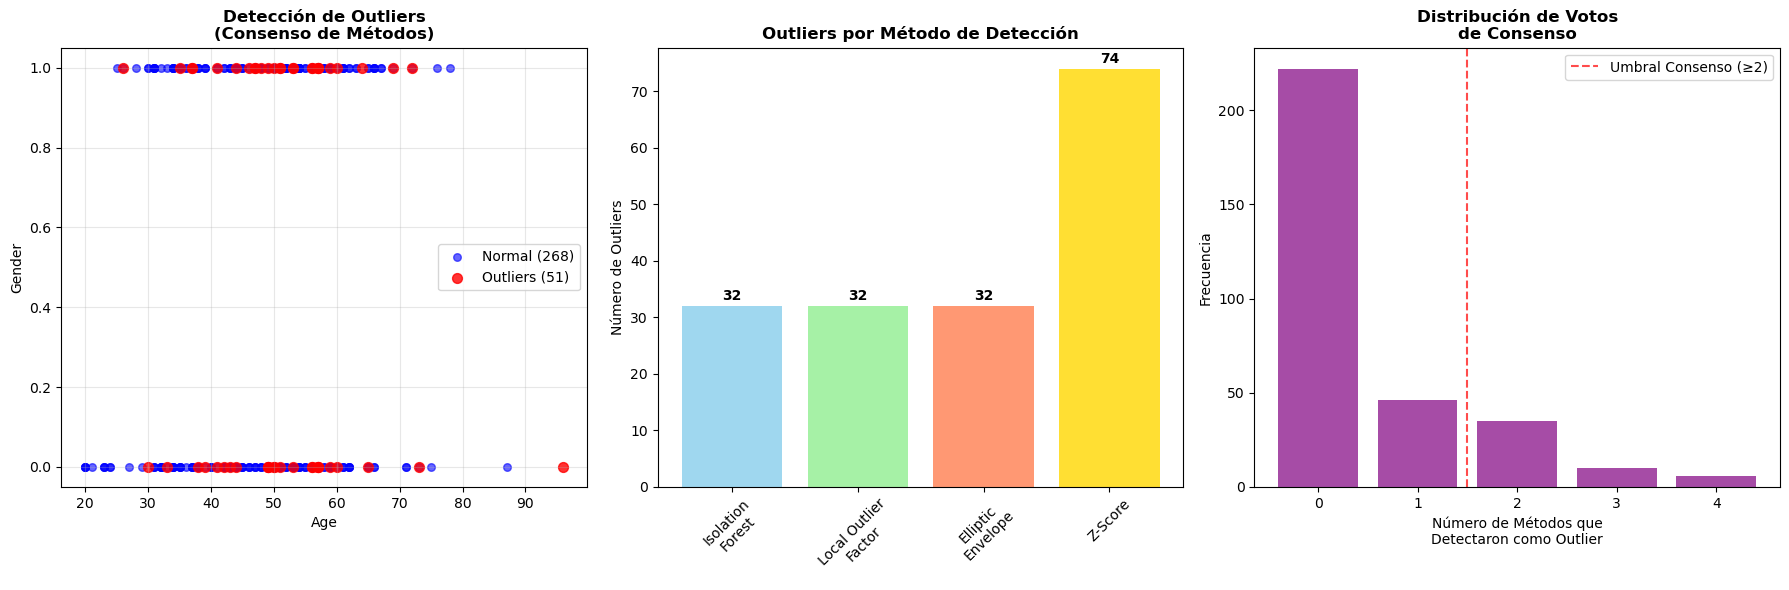


Outliers por clase de Gallstone:
is_outlier        False  True  All
Gallstone Status                  
0                   141    20  161
1                   127    31  158
All                 268    51  319

Porcentajes:
  Sin gallstone: 12.4% son outliers
  Con gallstone: 19.6% son outliers


In [16]:
# === VISUALIZACIÓN DE OUTLIERS ===
print("\nVISUALIZACIÓN DE OUTLIERS")
print("=" * 35)

if len(numeric_features) >= 2 and n_consensus > 0:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. Scatter plot de outliers
    feat1, feat2 = numeric_features[0], numeric_features[1]
    normal_mask = ~consensus_outliers
    
    axes[0].scatter(df.loc[normal_mask, feat1], 
                   df.loc[normal_mask, feat2], 
                   c='blue', alpha=0.6, label=f'Normal ({sum(normal_mask)})', s=30)
    axes[0].scatter(df.loc[consensus_outliers, feat1], 
                   df.loc[consensus_outliers, feat2], 
                   c='red', alpha=0.8, label=f'Outliers ({n_consensus})', s=50)
    axes[0].set_xlabel(feat1)
    axes[0].set_ylabel(feat2)
    axes[0].set_title('Detección de Outliers\n(Consenso de Métodos)', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # 2. Distribución de métodos de detección
    method_counts = [n_outliers_iso, n_outliers_lof, n_outliers_ee, n_outliers_zscore]
    method_names = ['Isolation\nForest', 'Local Outlier\nFactor', 'Elliptic\nEnvelope', 'Z-Score']
    
    bars = axes[1].bar(method_names, method_counts, color=['skyblue', 'lightgreen', 'coral', 'gold'], alpha=0.8)
    axes[1].set_title('Outliers por Método de Detección', fontweight='bold')
    axes[1].set_ylabel('Número de Outliers')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Agregar valores en las barras
    for bar, count in zip(bars, method_counts):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    str(count), ha='center', va='bottom', fontweight='bold')
    
    # 3. Distribución de votos de consenso
    vote_counts = pd.Series(outlier_votes).value_counts().sort_index()
    axes[2].bar(vote_counts.index, vote_counts.values, color='purple', alpha=0.7)
    axes[2].set_title('Distribución de Votos\nde Consenso', fontweight='bold')
    axes[2].set_xlabel('Número de Métodos que\nDetectaron como Outlier')
    axes[2].set_ylabel('Frecuencia')
    axes[2].set_xticks(range(5))
    
    # Línea de corte para consenso
    axes[2].axvline(x=1.5, color='red', linestyle='--', alpha=0.7, label='Umbral Consenso (≥2)')
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de outliers por variable objetivo
    print(f"\nOutliers por clase de Gallstone:")
    outlier_by_class = pd.crosstab(df['Gallstone Status'], df['is_outlier'], margins=True)
    print(outlier_by_class)
    
    print(f"\nPorcentajes:")
    for status in [0, 1]:
        subset = df[df['Gallstone Status'] == status]
        outlier_pct = subset['is_outlier'].mean() * 100
        label = "Sin gallstone" if status == 0 else "Con gallstone"
        print(f"  {label}: {outlier_pct:.1f}% son outliers")

else:
    print("No hay suficientes outliers o características para visualizar")

### 4.3 Feature Engineering Avanzado
Creamos nuevas características y transformamos las existentes para mejorar el rendimiento de los modelos.

In [17]:
# === FEATURE ENGINEERING AVANZADO ===
print("FEATURE ENGINEERING AVANZADO")
print("=" * 40)

# Crear una copia para feature engineering
df_features = df.copy()
initial_features = len(df_features.columns)

print(f"Características iniciales: {initial_features}")

# 1. Transformaciones de variables numéricas
print("\nTransformaciones numéricas:")

for col in numeric_features[:10]:  # Limitar a las primeras 10 para evitar explosion
    if col in df_features.columns:
        # Log transformation para variables con sesgo
        if (df_features[col] > 0).all():  # Solo si todos los valores son positivos
            skewness = df_features[col].skew()
            if abs(skewness) > 1:  # Si hay sesgo significativo
                df_features[f'{col}_log'] = np.log1p(df_features[col])
                print(f"  {col}_log creada (sesgo original: {skewness:.2f})")
        
        # Transformación cuadrática para variables importantes
        if col in top_vars[:5]:  # Solo para las top 5 variables
            df_features[f'{col}_squared'] = df_features[col] ** 2
            print(f"  {col}_squared creada")

print(f"  • Transformaciones aplicadas")

# 2. Interacciones entre variables importantes
print("\nInteracciones entre variables:")

# Crear interacciones entre las variables más importantes
important_pairs = [(top_vars[i], top_vars[j]) 
                  for i in range(min(3, len(top_vars))) 
                  for j in range(i+1, min(i+3, len(top_vars)))]

for feat1, feat2 in important_pairs[:5]:  # Limitar a 5 interacciones
    if feat1 in df_features.columns and feat2 in df_features.columns:
        # Multiplicación
        df_features[f'{feat1}_x_{feat2}'] = df_features[feat1] * df_features[feat2]
        
        # Ratio (evitar división por cero)
        with np.errstate(divide='ignore', invalid='ignore'):
            ratio = df_features[feat1] / (df_features[feat2] + 1e-8)
            ratio = np.where(np.isfinite(ratio), ratio, 0)
            df_features[f'{feat1}_div_{feat2}'] = ratio

print(f"  • Creadas {len(important_pairs[:5]) * 2} interacciones")

# 3. Índices compuestos de salud
print("\nÍndices compuestos de salud:")

# Índice de composición corporal
if all(col in df_features.columns for col in ['Body Mass Index (BMI)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)']):
    df_features['Body_Composition_Index'] = (
        df_features['Body Mass Index (BMI)'] * 0.4 +
        df_features['Total Body Fat Ratio (TBFR) (%)'] * 0.3 +
        (100 - df_features['Lean Mass (LM) (%)']) * 0.3
    )
    print(f"  Body_Composition_Index creado")

# Índice de riesgo metabólico
if all(col in df_features.columns for col in ['Glucose', 'Total Cholesterol (TC)', 'Triglyceride']):
    # Normalizar cada componente entre 0 y 1
    glucose_norm = (df_features['Glucose'] - df_features['Glucose'].min()) / (df_features['Glucose'].max() - df_features['Glucose'].min())
    chol_norm = (df_features['Total Cholesterol (TC)'] - df_features['Total Cholesterol (TC)'].min()) / (df_features['Total Cholesterol (TC)'].max() - df_features['Total Cholesterol (TC)'].min())
    trig_norm = (df_features['Triglyceride'] - df_features['Triglyceride'].min()) / (df_features['Triglyceride'].max() - df_features['Triglyceride'].min())
    
    df_features['Metabolic_Risk_Index'] = (glucose_norm + chol_norm + trig_norm) / 3
    print(f"  Metabolic_Risk_Index creado")

# Índice de inflamación
if 'C-Reactive Protein (CRP)' in df_features.columns:
    df_features['Inflammation_Level'] = pd.cut(df_features['C-Reactive Protein (CRP)'], 
                                             bins=[0, 1, 3, 10, float('inf')], 
                                             labels=['Bajo', 'Normal', 'Alto', 'Muy_Alto'])
    print(f"  Inflammation_Level creado")

# 4. Binning de variables continuas
print("\nBinning de variables continuas:")

for var in top_vars[:3]:  # Solo para las top 3 variables
    if var in df_features.columns:
        df_features[f'{var}_binned'] = pd.cut(df_features[var], bins=5, 
                                            labels=['Muy_Bajo', 'Bajo', 'Medio', 'Alto', 'Muy_Alto'])
        print(f"  {var}_binned creado")

final_features = len(df_features.columns)
print(f"\nResumen de Feature Engineering:")
print(f"  • Características iniciales: {initial_features}")
print(f"  • Características finales: {final_features}")
print(f"  • Nuevas características creadas: {final_features - initial_features}")

FEATURE ENGINEERING AVANZADO
Características iniciales: 40

Transformaciones numéricas:
  • Transformaciones aplicadas

Interacciones entre variables:
  • Creadas 10 interacciones

Índices compuestos de salud:
  Body_Composition_Index creado
  Metabolic_Risk_Index creado
  Inflammation_Level creado

Binning de variables continuas:
  Vitamin D_binned creado
  C-Reactive Protein (CRP)_binned creado
  Lean Mass (LM) (%)_binned creado

Resumen de Feature Engineering:
  • Características iniciales: 40
  • Características finales: 56
  • Nuevas características creadas: 16


### 4.4 Balanceo de Datos con Técnicas Avanzadas
Aplicamos SMOTE y técnicas combinadas para optimizar el balance de clases.

In [18]:
# === TÉCNICAS AVANZADAS DE BALANCEO DE DATOS ===
print("TÉCNICAS AVANZADAS DE BALANCEO")
print("=" * 45)

# Preparar datos para balanceo
X_features = df_features.drop(columns=['Gallstone Status', 'is_outlier'], errors='ignore')
y_target = df_features['Gallstone Status']

# Solo mantener características numéricas para SMOTE
X_numeric_only = X_features.select_dtypes(include=[np.number])

print(f"Características para balanceo: {X_numeric_only.shape[1]}")
print(f"Muestras: {len(y_target)}")
print(f"Distribución original: {Counter(y_target)}")

# Verificar si necesita balanceo
class_counts = Counter(y_target)
minority_class = min(class_counts.values())
majority_class = max(class_counts.values())
imbalance_ratio = minority_class / majority_class

print(f"Ratio de desbalance: {imbalance_ratio:.3f}")

if imbalance_ratio < 0.8:  # Si el desbalance es significativo
    print("\nAplicando técnicas de balanceo...")
    
    try:
        # Técnica 1: SMOTE estándar
        print("\nSMOTE Estándar:")
        k_neighbors = min(5, minority_class-1) if minority_class > 1 else 1
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
        X_smote, y_smote = smote.fit_resample(X_numeric_only, y_target)
        print(f"  SMOTE aplicado: {Counter(y_smote)}")
        
        # Técnica 2: ADASYN (Adaptive Synthetic Sampling)
        print("\nADASYN:")
        try:
            adasyn = ADASYN(random_state=42, n_neighbors=k_neighbors)
            X_adasyn, y_adasyn = adasyn.fit_resample(X_numeric_only, y_target)
            print(f"  ADASYN aplicado: {Counter(y_adasyn)}")
        except Exception as e:
            print(f"  ADASYN fallo: {e}")
            X_adasyn, y_adasyn = X_smote.copy(), y_smote.copy()
        
        # Técnica 3: SMOTE + Tomek Links (combinado)
        print("\nSMOTE + Tomek Links:")
        try:
            smote_tomek = SMOTETomek(random_state=42, 
                                   smote=SMOTE(k_neighbors=k_neighbors))
            X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_numeric_only, y_target)
            print(f"  SMOTE+Tomek aplicado: {Counter(y_smote_tomek)}")
        except Exception as e:
            print(f"  SMOTE+Tomek fallo: {e}")
            X_smote_tomek, y_smote_tomek = X_smote.copy(), y_smote.copy()
        
        # Crear datasets balanceados
        datasets = {
            'original': (X_numeric_only, y_target),
            'smote': (pd.DataFrame(X_smote, columns=X_numeric_only.columns), pd.Series(y_smote)),
            'adasyn': (pd.DataFrame(X_adasyn, columns=X_numeric_only.columns), pd.Series(y_adasyn)),
            'smote_tomek': (pd.DataFrame(X_smote_tomek, columns=X_numeric_only.columns), pd.Series(y_smote_tomek))
        }
        
        print(f"\nDatasets creados:")
        for name, (X_data, y_data) in datasets.items():
            print(f"  • {name}: {X_data.shape[0]} muestras, balance: {Counter(y_data)}")
            
    except Exception as e:
        print(f"\nError en balanceo: {e}")
        print("Continuando con datos originales...")
        datasets = {'original': (X_numeric_only, y_target)}
        
else:
    print("\nDataset suficientemente balanceado, no se requiere balanceo")
    datasets = {'original': (X_numeric_only, y_target)}

TÉCNICAS AVANZADAS DE BALANCEO
Características para balanceo: 50
Muestras: 319
Distribución original: Counter({0: 161, 1: 158})
Ratio de desbalance: 0.981

Dataset suficientemente balanceado, no se requiere balanceo


In [19]:
# === VISUALIZACIÓN DEL BALANCEO ===
print("\nVISUALIZACIÓN DEL BALANCEO")
print("=" * 35)

if len(datasets) > 1 and len(X_numeric_only.columns) >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Seleccionar las dos primeras características para visualización
    feat1, feat2 = X_numeric_only.columns[0], X_numeric_only.columns[1]
    
    # Configurar los subplots
    plot_configs = [
        ('original', 'Datos Originales', axes[0,0]),
        ('smote', 'SMOTE', axes[0,1]),
        ('adasyn', 'ADASYN', axes[1,0]),
        ('smote_tomek', 'SMOTE + Tomek', axes[1,1])
    ]
    
    for dataset_name, title, ax in plot_configs:
        if dataset_name in datasets:
            X_data, y_data = datasets[dataset_name]
            
            # Scatter plot por clase
            for class_val in np.unique(y_data):
                if dataset_name == 'original':
                    mask = y_data == class_val
                    x_vals = X_data.loc[mask, feat1] if hasattr(X_data, 'loc') else X_data[mask, 0]
                    y_vals = X_data.loc[mask, feat2] if hasattr(X_data, 'loc') else X_data[mask, 1]
                else:
                    mask = y_data == class_val
                    x_vals = X_data[mask][feat1] if hasattr(X_data, 'columns') else X_data[mask, 0]
                    y_vals = X_data[mask][feat2] if hasattr(X_data, 'columns') else X_data[mask, 1]
                
                label = f'Clase {class_val} ({sum(mask)})'
                color = 'lightcoral' if class_val == 0 else 'lightblue'
                ax.scatter(x_vals, y_vals, alpha=0.6, label=label, color=color, s=20)
            
            ax.set_title(f'{title}\n({len(y_data)} muestras)', fontweight='bold')
            ax.set_xlabel(feat1)
            ax.set_ylabel(feat2)
            ax.legend()
            ax.grid(alpha=0.3)
    
    plt.suptitle('Comparación de Técnicas de Balanceo', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Gráfico de barras comparativo
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    dataset_names = list(datasets.keys())
    class_0_counts = [Counter(datasets[name][1])[0] for name in dataset_names]
    class_1_counts = [Counter(datasets[name][1])[1] for name in dataset_names]
    
    x = np.arange(len(dataset_names))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, class_0_counts, width, label='Sin gallstone (0)', color='lightcoral', alpha=0.8)
    bars2 = ax.bar(x + width/2, class_1_counts, width, label='Con gallstone (1)', color='lightblue', alpha=0.8)
    
    ax.set_xlabel('Técnica de Balanceo')
    ax.set_ylabel('Número de Muestras')
    ax.set_title('Comparación de Balance de Clases', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([name.upper() for name in dataset_names])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Agregar valores en las barras
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No hay suficientes datasets o características para visualizar")


VISUALIZACIÓN DEL BALANCEO
No hay suficientes datasets o características para visualizar


## 5. Selección de Características con Algoritmos Genéticos

### 5.1 Implementación de Algoritmo Genético
Utilizamos técnicas heurísticas avanzadas para optimizar la selección de características.

In [20]:
# === ALGORITMO GENÉTICO PARA FEATURE SELECTION ===
print("ALGORITMO GENÉTICO PARA FEATURE SELECTION")
print("=" * 55)

# Usar el dataset original para la selección de características
X_for_selection, y_for_selection = datasets['original']
n_features = X_for_selection.shape[1]

print(f"Número de características: {n_features}")

# Solo proceder si tenemos suficientes características y DEAP está disponible
if n_features > 5:
    try:
        # Limpiar creators previos si existen
        if hasattr(creator, "FitnessMax"):
            del creator.FitnessMax
        if hasattr(creator, "Individual"):
            del creator.Individual
            
        # Definir el problema de optimización
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizar fitness
        creator.create("Individual", list, fitness=creator.FitnessMax)
        
        # Configurar el toolbox
        toolbox = base.Toolbox()
        
        # Crear individuos (vectores binarios representando selección de features)
        toolbox.register("attr_bool", random.randint, 0, 1)
        toolbox.register("individual", tools.initRepeat, creator.Individual, 
                        toolbox.attr_bool, n_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        
        # Función de evaluación (fitness)
        def evaluate_features(individual):
            """Evaluar la calidad de un subconjunto de características"""
            # Seleccionar características basadas en el individuo
            selected_features = [i for i, x in enumerate(individual) if x == 1]
            
            # Asegurar que al menos una característica esté seleccionada
            if len(selected_features) == 0:
                return (0.0,)
            
            # Crear subset de datos
            if hasattr(X_for_selection, 'iloc'):
                X_subset = X_for_selection.iloc[:, selected_features]
            else:
                X_subset = X_for_selection[:, selected_features]
            
            # Evaluar con validación cruzada rápida
            try:
                # Usar RandomForest rápido para evaluación
                rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
                scores = cross_val_score(rf, X_subset, y_for_selection, cv=3, scoring='f1_weighted')
                
                # Penalizar por tener demasiadas características
                feature_penalty = len(selected_features) / n_features * 0.1
                fitness = scores.mean() - feature_penalty
                
                return (max(fitness, 0.0),)  # Asegurar fitness no negativo
            except:
                return (0.0,)
        
        # Registrar operadores genéticos
        toolbox.register("evaluate", evaluate_features)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
        toolbox.register("select", tools.selTournament, tournsize=3)
        
        # Parámetros del algoritmo genético
        POPULATION_SIZE = 30  # Reducido para velocidad
        GENERATIONS = 15      # Reducido para velocidad
        CROSSOVER_PROB = 0.7
        MUTATION_PROB = 0.2
        
        print(f"\nEjecutando algoritmo genético...")
        print(f"  • Población: {POPULATION_SIZE}")
        print(f"  • Generaciones: {GENERATIONS}")
        print(f"  • Prob. cruzamiento: {CROSSOVER_PROB}")
        print(f"  • Prob. mutación: {MUTATION_PROB}")
        
        # Crear población inicial
        population = toolbox.population(n=POPULATION_SIZE)
        
        # Evaluar población inicial
        print("Evaluando población inicial...")
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
        
        # Estadísticas de evolución
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("max", np.max)
        stats.register("min", np.min)
        
        # Ejecutar algoritmo genético
        print("Ejecutando evolución...")
        population, logbook = algorithms.eaSimple(
            population, toolbox, 
            cxpb=CROSSOVER_PROB, 
            mutpb=MUTATION_PROB, 
            ngen=GENERATIONS, 
            stats=stats,
            verbose=False
        )
        
        # Obtener el mejor individuo
        best_individual = tools.selBest(population, 1)[0]
        best_features_mask = [bool(x) for x in best_individual]
        selected_feature_indices = [i for i, x in enumerate(best_features_mask) if x]
        
        if hasattr(X_for_selection, 'columns'):
            selected_feature_names = X_for_selection.columns[selected_feature_indices].tolist()
        else:
            selected_feature_names = [f'Feature_{i}' for i in selected_feature_indices]
        
        print(f"\nRESULTADOS DEL ALGORITMO GENÉTICO:")
        print(f"  • Mejor fitness: {best_individual.fitness.values[0]:.4f}")
        print(f"  • Características seleccionadas: {len(selected_feature_names)}/{n_features}")
        print(f"  • Reducción: {(1 - len(selected_feature_names)/n_features)*100:.1f}%")
        
        print(f"\nCaracterísticas seleccionadas:")
        for i, feature in enumerate(selected_feature_names[:10], 1):  # Mostrar solo las primeras 10
            print(f"  {i:2d}. {feature}")
        if len(selected_feature_names) > 10:
            print(f"  ... y {len(selected_feature_names) - 10} más")
        
        # Crear dataset optimizado
        if hasattr(X_for_selection, 'columns'):
            X_optimized = X_for_selection[selected_feature_names]
        else:
            X_optimized = X_for_selection[:, selected_feature_indices]
        
        print(f"\nDataset optimizado creado: {X_optimized.shape}")
        
        # Guardar resultados para uso posterior
        ga_results = {
            'selected_features': selected_feature_names,
            'fitness': best_individual.fitness.values[0],
            'logbook': logbook
        }
        
    except Exception as e:
        print(f"\nError en algoritmo genético: {e}")
        print("Usando todas las características disponibles...")
        X_optimized = X_for_selection
        if hasattr(X_for_selection, 'columns'):
            selected_feature_names = X_for_selection.columns.tolist()
        else:
            selected_feature_names = [f'Feature_{i}' for i in range(X_for_selection.shape[1])]
        ga_results = {'selected_features': selected_feature_names, 'fitness': 0.0}
        
else:
    print(f"\nMuy pocas características ({n_features}) para algoritmo genético")
    print("Usando todas las características disponibles...")
    X_optimized = X_for_selection
    if hasattr(X_for_selection, 'columns'):
        selected_feature_names = X_for_selection.columns.tolist()
    else:
        selected_feature_names = [f'Feature_{i}' for i in range(X_for_selection.shape[1])]
    ga_results = {'selected_features': selected_feature_names, 'fitness': 0.0}

ALGORITMO GENÉTICO PARA FEATURE SELECTION
Número de características: 50

Ejecutando algoritmo genético...
  • Población: 30
  • Generaciones: 15
  • Prob. cruzamiento: 0.7
  • Prob. mutación: 0.2
Evaluando población inicial...
Ejecutando evolución...

RESULTADOS DEL ALGORITMO GENÉTICO:
  • Mejor fitness: 0.7153
  • Características seleccionadas: 18/50
  • Reducción: 64.0%

Características seleccionadas:
   1. Gender
   2. Hypothyroidism
   3. Hyperlipidemia
   4. Height
   5. Body Mass Index (BMI)
   6. Lean Mass (LM) (%)
   7. Body Protein Content (Protein) (%)
   8. Visceral Fat Area (VFA)
   9. Aspartat Aminotransferaz (AST)
  10. Alanin Aminotransferaz (ALT)
  ... y 8 más

Dataset optimizado creado: (319, 18)



VISUALIZACIÓN DEL ALGORITMO GENÉTICO


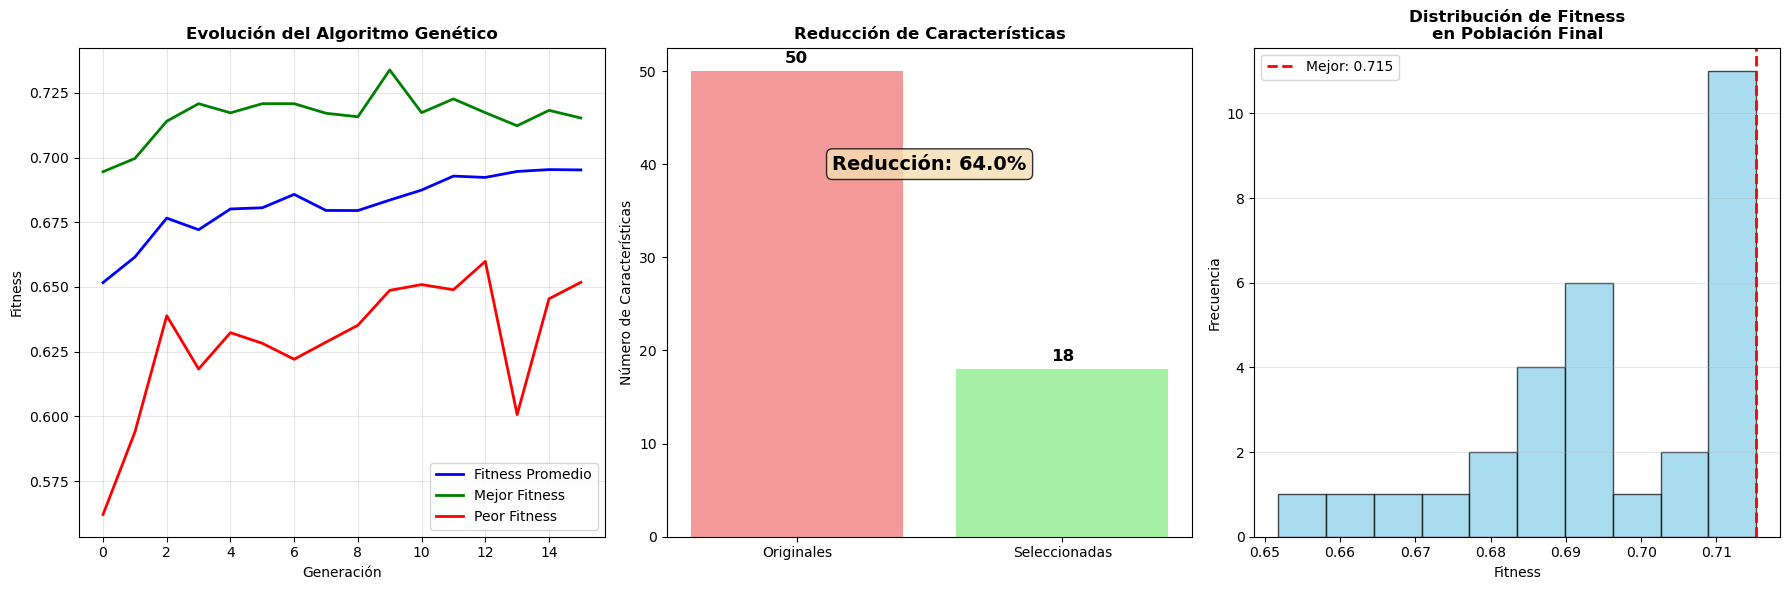

In [21]:
# === VISUALIZACIÓN DEL ALGORITMO GENÉTICO ===
print("\nVISUALIZACIÓN DEL ALGORITMO GENÉTICO")
print("=" * 45)

if 'logbook' in ga_results and ga_results['logbook'] is not None:
    logbook = ga_results['logbook']
    
    # Visualizar evolución del algoritmo
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. Evolución del fitness
    generations = logbook.select("gen")
    avg_fitness = logbook.select("avg")
    max_fitness = logbook.select("max")
    min_fitness = logbook.select("min")
    
    axes[0].plot(generations, avg_fitness, 'b-', label='Fitness Promedio', linewidth=2)
    axes[0].plot(generations, max_fitness, 'g-', label='Mejor Fitness', linewidth=2)
    axes[0].plot(generations, min_fitness, 'r-', label='Peor Fitness', linewidth=2)
    axes[0].set_xlabel('Generación')
    axes[0].set_ylabel('Fitness')
    axes[0].set_title('Evolución del Algoritmo Genético', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # 2. Reducción de características
    original_features = n_features
    selected_features = len(ga_results['selected_features'])
    
    bars = axes[1].bar(['Originales', 'Seleccionadas'], [original_features, selected_features],
                      color=['lightcoral', 'lightgreen'], alpha=0.8)
    axes[1].set_title('Reducción de Características', fontweight='bold')
    axes[1].set_ylabel('Número de Características')
    
    # Agregar valores en las barras
    for bar, value in zip(bars, [original_features, selected_features]):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    str(value), ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # Agregar porcentaje de reducción
    reduction_pct = (1 - selected_features/original_features) * 100
    axes[1].text(0.5, max(original_features, selected_features) * 0.8, 
                f'Reducción: {reduction_pct:.1f}%', 
                ha='center', va='center', fontweight='bold', fontsize=14,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # 3. Distribución de fitness final
    if len(population) > 0:
        final_fitnesses = [ind.fitness.values[0] for ind in population]
        axes[2].hist(final_fitnesses, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
        axes[2].axvline(x=ga_results['fitness'], color='red', linestyle='--', 
                       linewidth=2, label=f'Mejor: {ga_results["fitness"]:.3f}')
        axes[2].set_xlabel('Fitness')
        axes[2].set_ylabel('Frecuencia')
        axes[2].set_title('Distribución de Fitness\nen Población Final', fontweight='bold')
        axes[2].legend()
        axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No hay datos de evolución para visualizar")
    
    # Mostrar solo la reducción de características
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    original_features = n_features
    selected_features = len(ga_results['selected_features'])
    
    bars = ax.bar(['Originales', 'Seleccionadas'], [original_features, selected_features],
                  color=['lightcoral', 'lightgreen'], alpha=0.8)
    ax.set_title('Características Seleccionadas', fontweight='bold', fontsize=14)
    ax.set_ylabel('Número de Características')
    
    # Agregar valores en las barras
    for bar, value in zip(bars, [original_features, selected_features]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                str(value), ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()

## 6. Implementación de Modelos Avanzados

### 6.1 Preparación de Datos para Modelos
Preparamos los conjuntos de entrenamiento y prueba con las características optimizadas.

In [22]:
# === PREPARACIÓN DE DATOS PARA MODELOS ===
print("PREPARACIÓN DE DATOS PARA MODELOS")
print("=" * 50)

# Usar características optimizadas por algoritmo genético
X_final = X_optimized.copy()
y_final = y_for_selection.copy()

print(f"Características finales: {X_final.shape[1]}")
print(f"Muestras totales: {len(y_final)}")

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_final
)

print(f"\nDivisión del dataset:")
print(f"  • Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(y_final)*100:.1f}%)")
print(f"  • Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(y_final)*100:.1f}%)")

# Verificar distribución de clases
train_dist = Counter(y_train)
test_dist = Counter(y_test)

print(f"\nDistribución de clases:")
print(f"  Entrenamiento: {train_dist}")
print(f"  Prueba: {test_dist}")

# Aplicar SMOTE solo al conjunto de entrenamiento
if 'smote' in datasets and len(datasets) > 1:
    print(f"\nAplicando SMOTE al conjunto de entrenamiento...")
    
    # Asegurar que tenemos suficientes muestras para SMOTE
    min_samples = min(train_dist.values())
    k_neighbors = min(5, min_samples - 1) if min_samples > 1 else 1
    
    if k_neighbors > 0:
        try:
            smote_train = SMOTE(random_state=42, k_neighbors=k_neighbors)
            
            # Seleccionar solo las características que tenemos
            if hasattr(X_train, 'columns'):
                available_features = [f for f in selected_feature_names if f in X_train.columns]
                X_train_selected = X_train[available_features]
            else:
                X_train_selected = X_train
            
            X_train_balanced, y_train_balanced = smote_train.fit_resample(
                X_train_selected, y_train
            )
            
            print(f"  SMOTE aplicado al entrenamiento")
            print(f"  • Antes: {Counter(y_train)}")
            print(f"  • Después: {Counter(y_train_balanced)}")
            
            # Convertir a DataFrame para consistencia
            if hasattr(X_train, 'columns'):
                X_train_balanced = pd.DataFrame(X_train_balanced, columns=available_features)
            else:
                X_train_balanced = pd.DataFrame(X_train_balanced)
            y_train_balanced = pd.Series(y_train_balanced)
            
        except Exception as e:
            print(f"  Error aplicando SMOTE: {e}")
            X_train_balanced = X_train.copy()
            y_train_balanced = y_train.copy()
    else:
        print(f"  No se puede aplicar SMOTE (muy pocas muestras)")
        X_train_balanced = X_train.copy()
        y_train_balanced = y_train.copy()
else:
    X_train_balanced = X_train.copy()
    y_train_balanced = y_train.copy()

# Preparar conjunto de prueba
if hasattr(X_test, 'columns') and hasattr(X_train_balanced, 'columns'):
    common_features = [f for f in X_train_balanced.columns if f in X_test.columns]
    X_test_final = X_test[common_features]
    X_train_balanced = X_train_balanced[common_features]
else:
    X_test_final = X_test.copy()

y_test_final = y_test.copy()

print(f"\nDatos finales para entrenamiento:")
print(f"  • X_train_balanced: {X_train_balanced.shape}")
print(f"  • y_train_balanced: {len(y_train_balanced)} - {Counter(y_train_balanced)}")
print(f"  • X_test_final: {X_test_final.shape}")
print(f"  • y_test_final: {len(y_test_final)} - {Counter(y_test_final)}")

# Escalar datos para modelos que lo requieren
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train_balanced)
X_test_scaled = scaler_final.transform(X_test_final)

PREPARACIÓN DE DATOS PARA MODELOS
Características finales: 18
Muestras totales: 319

División del dataset:
  • Entrenamiento: 255 muestras (79.9%)
  • Prueba: 64 muestras (20.1%)

Distribución de clases:
  Entrenamiento: Counter({0: 129, 1: 126})
  Prueba: Counter({1: 32, 0: 32})

Datos finales para entrenamiento:
  • X_train_balanced: (255, 18)
  • y_train_balanced: 255 - Counter({0: 129, 1: 126})
  • X_test_final: (64, 18)
  • y_test_final: 64 - Counter({1: 32, 0: 32})


### 6.2 Modelo 1: XGBoost Classifier
Implementamos XGBoost con optimización de hiperparámetros.

In [23]:
# === IMPLEMENTACIÓN Y OPTIMIZACIÓN DE XGBOOST ===
print("MODELO 1: XGBOOST CLASSIFIER")
print("=" * 50)

try:
    # Modelo XGBoost inicial
    print("Entrenando XGBoost inicial...")
    
    xgb_initial = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss',
        verbosity=0
    )
    
    # Entrenamiento inicial
    xgb_initial.fit(X_train_balanced, y_train_balanced)
    
    # Predicciones iniciales
    y_pred_xgb_initial = xgb_initial.predict(X_test_final)
    y_pred_proba_xgb_initial = xgb_initial.predict_proba(X_test_final)[:, 1]
    
    # Métricas iniciales
    acc_xgb_initial = accuracy_score(y_test_final, y_pred_xgb_initial)
    prec_xgb_initial = precision_score(y_test_final, y_pred_xgb_initial, average='weighted')
    rec_xgb_initial = recall_score(y_test_final, y_pred_xgb_initial, average='weighted')
    f1_xgb_initial = f1_score(y_test_final, y_pred_xgb_initial, average='weighted')
    
    try:
        roc_auc_xgb_initial = roc_auc_score(y_test_final, y_pred_proba_xgb_initial)
    except:
        roc_auc_xgb_initial = 0.0
    
    print(f"\nRESULTADOS XGBOOST INICIAL:")
    print(f"  • Accuracy: {acc_xgb_initial:.4f}")
    print(f"  • Precision: {prec_xgb_initial:.4f}")
    print(f"  • Recall: {rec_xgb_initial:.4f}")
    print(f"  • F1-Score: {f1_xgb_initial:.4f}")
    print(f"  • ROC-AUC: {roc_auc_xgb_initial:.4f}")
    
    # Optimización de hiperparámetros
    print(f"\nOPTIMIZACIÓN DE HIPERPARÁMETROS XGBOOST")
    print("=" * 55)
    
    # Parámetros para optimizar (reducidos para velocidad)
    param_grid_xgb = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
    }
    
    print(f"Optimizando {len(param_grid_xgb)} hiperparámetros...")
    
    # Grid Search con validación cruzada
    grid_xgb = GridSearchCV(
        xgb.XGBClassifier(random_state=42, eval_metric='logloss', verbosity=0),
        param_grid_xgb,
        cv=3,  # Reducido para velocidad
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=0
    )
    
    print("Ejecutando Grid Search...")
    grid_xgb.fit(X_train_balanced, y_train_balanced)
    
    # Mejor modelo
    best_xgb = grid_xgb.best_estimator_
    
    print(f"\nMEJORES HIPERPARÁMETROS XGBOOST:")
    for param, value in grid_xgb.best_params_.items():
        print(f"  • {param}: {value}")
    print(f"\nMejor puntuación F1 (CV): {grid_xgb.best_score_:.4f}")
    
    # Evaluar mejor modelo
    y_pred_xgb_best = best_xgb.predict(X_test_final)
    y_pred_proba_xgb_best = best_xgb.predict_proba(X_test_final)[:, 1]
    
    # Métricas optimizadas
    acc_xgb_best = accuracy_score(y_test_final, y_pred_xgb_best)
    prec_xgb_best = precision_score(y_test_final, y_pred_xgb_best, average='weighted')
    rec_xgb_best = recall_score(y_test_final, y_pred_xgb_best, average='weighted')
    f1_xgb_best = f1_score(y_test_final, y_pred_xgb_best, average='weighted')
    bal_acc_xgb_best = balanced_accuracy_score(y_test_final, y_pred_xgb_best)
    
    try:
        roc_auc_xgb_best = roc_auc_score(y_test_final, y_pred_proba_xgb_best)
    except:
        roc_auc_xgb_best = 0.0
    
    print(f"\nRESULTADOS XGBOOST OPTIMIZADO:")
    print(f"  • Accuracy: {acc_xgb_best:.4f}")
    print(f"  • Balanced Accuracy: {bal_acc_xgb_best:.4f}")
    print(f"  • Precision: {prec_xgb_best:.4f}")
    print(f"  • Recall: {rec_xgb_best:.4f}")
    print(f"  • F1-Score: {f1_xgb_best:.4f}")
    print(f"  • ROC-AUC: {roc_auc_xgb_best:.4f}")
    
    # Importancia de características
    feature_importance_xgb = pd.DataFrame({
        'feature': X_train_balanced.columns,
        'importance': best_xgb.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTOP 10 CARACTERÍSTICAS MÁS IMPORTANTES (XGBoost):")
    for i, (_, row) in enumerate(feature_importance_xgb.head(10).iterrows(), 1):
        print(f"  {i:2d}. {row['feature']}: {row['importance']:.4f}")
    
    xgb_available = True
    
except Exception as e:
    print(f"\nError con XGBoost: {e}")
    print("Continuando sin XGBoost...")
    
    # Valores por defecto si XGBoost falla
    acc_xgb_initial = acc_xgb_best = 0.0
    prec_xgb_initial = prec_xgb_best = 0.0
    rec_xgb_initial = rec_xgb_best = 0.0
    f1_xgb_initial = f1_xgb_best = 0.0
    bal_acc_xgb_best = 0.0
    roc_auc_xgb_initial = roc_auc_xgb_best = 0.0
    
    xgb_available = False

MODELO 1: XGBOOST CLASSIFIER
Entrenando XGBoost inicial...

RESULTADOS XGBOOST INICIAL:
  • Accuracy: 0.7344
  • Precision: 0.7346
  • Recall: 0.7344
  • F1-Score: 0.7343
  • ROC-AUC: 0.8408

OPTIMIZACIÓN DE HIPERPARÁMETROS XGBOOST
Optimizando 4 hiperparámetros...
Ejecutando Grid Search...

MEJORES HIPERPARÁMETROS XGBOOST:
  • learning_rate: 0.1
  • max_depth: 6
  • n_estimators: 100
  • subsample: 0.8

Mejor puntuación F1 (CV): 0.7776

RESULTADOS XGBOOST OPTIMIZADO:
  • Accuracy: 0.7500
  • Balanced Accuracy: 0.7500
  • Precision: 0.7540
  • Recall: 0.7500
  • F1-Score: 0.7490
  • ROC-AUC: 0.8643

TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES (XGBoost):
   1. Vitamin D_div_C-Reactive Protein (CRP): 0.1647
   2. Hyperlipidemia: 0.1143
   3. C-Reactive Protein (CRP)_div_Total Body Fat Ratio (TBFR) (%): 0.0695
   4. Aspartat Aminotransferaz (AST): 0.0594
   5. C-Reactive Protein (CRP)_x_Lean Mass (LM) (%): 0.0594
   6. Body Protein Content (Protein) (%): 0.0576
   7. Lean Mass (LM) (%): 0.0527


### 6.3 Modelo 2: Red Neuronal (MLP)
Implementamos una red neuronal con regularización y optimización.

In [24]:
# === RED NEURONAL (MLP) ===
print("\nMODELO 2: RED NEURONAL (MLP)")
print("=" * 45)

# Red Neuronal con optimización
print("Entrenando Red Neuronal...")

n_features = X_train_scaled.shape[1]
hidden_layer_sizes = (min(100, n_features*2), min(50, n_features))

nn_model = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

try:
    # Entrenar el modelo
    nn_model.fit(X_train_scaled, y_train_balanced)
    
    # Predicciones
    y_pred_nn = nn_model.predict(X_test_scaled)
    y_pred_proba_nn = nn_model.predict_proba(X_test_scaled)[:, 1]
    
    # Métricas de la red neuronal
    acc_nn = accuracy_score(y_test_final, y_pred_nn)
    prec_nn = precision_score(y_test_final, y_pred_nn, average='weighted')
    rec_nn = recall_score(y_test_final, y_pred_nn, average='weighted')
    f1_nn = f1_score(y_test_final, y_pred_nn, average='weighted')
    bal_acc_nn = balanced_accuracy_score(y_test_final, y_pred_nn)
    
    try:
        roc_auc_nn = roc_auc_score(y_test_final, y_pred_proba_nn)
    except:
        roc_auc_nn = 0.0
    
    print(f"\nRESULTADOS RED NEURONAL:")
    print(f"  • Arquitectura: {hidden_layer_sizes}")
    print(f"  • Iteraciones: {nn_model.n_iter_}")
    print(f"  • Accuracy: {acc_nn:.4f}")
    print(f"  • Balanced Accuracy: {bal_acc_nn:.4f}")
    print(f"  • Precision: {prec_nn:.4f}")
    print(f"  • Recall: {rec_nn:.4f}")
    print(f"  • F1-Score: {f1_nn:.4f}")
    print(f"  • ROC-AUC: {roc_auc_nn:.4f}")
    
    nn_available = True
    
except Exception as e:
    print(f"\nError con Red Neuronal: {e}")
    
    # Valores por defecto si falla
    acc_nn = prec_nn = rec_nn = f1_nn = bal_acc_nn = roc_auc_nn = 0.0
    nn_available = False


MODELO 2: RED NEURONAL (MLP)
Entrenando Red Neuronal...

RESULTADOS RED NEURONAL:
  • Arquitectura: (36, 18)
  • Iteraciones: 16
  • Accuracy: 0.5938
  • Balanced Accuracy: 0.5938
  • Precision: 0.6159
  • Recall: 0.5938
  • F1-Score: 0.5733
  • ROC-AUC: 0.5645


## 7. Evaluación y Comparación de Modelos

### 7.1 Comparación Detallada de Resultados
Comparamos el rendimiento de todos los modelos implementados.

COMPARACIÓN EXHAUSTIVA DE MODELOS

TABLA DE RESULTADOS COMPARATIVA:
               Modelo  Accuracy  Precision  Recall  F1_Score  ROC_AUC  \
0     XGBoost Inicial    0.7344     0.7346  0.7344    0.7343   0.8408   
1  XGBoost Optimizado    0.7500     0.7540  0.7500    0.7490   0.8643   
2        Red Neuronal    0.5938     0.6159  0.5938    0.5733   0.5645   

   Balanced_Accuracy  
0             0.7344  
1             0.7500  
2             0.5938  

MEJOR MODELO: XGBoost Optimizado
F1-Score: 0.7490


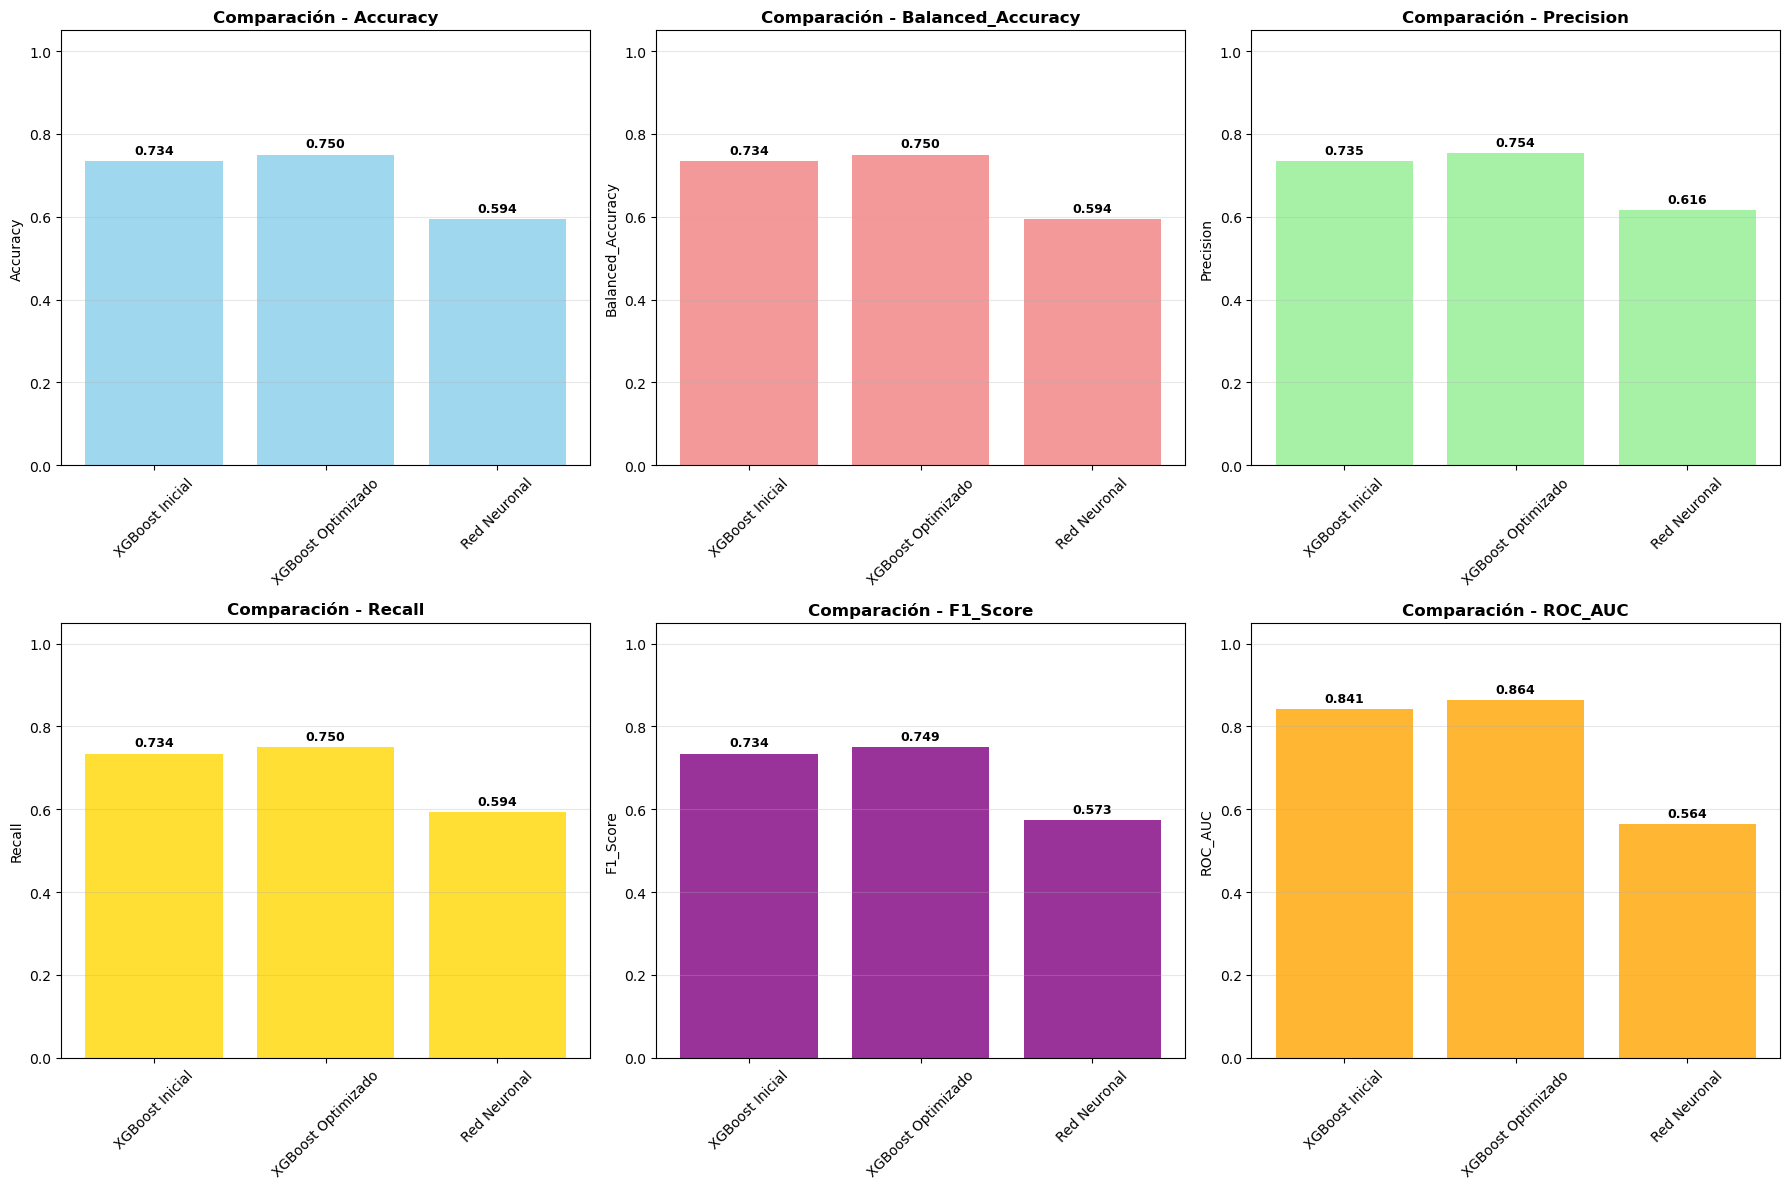

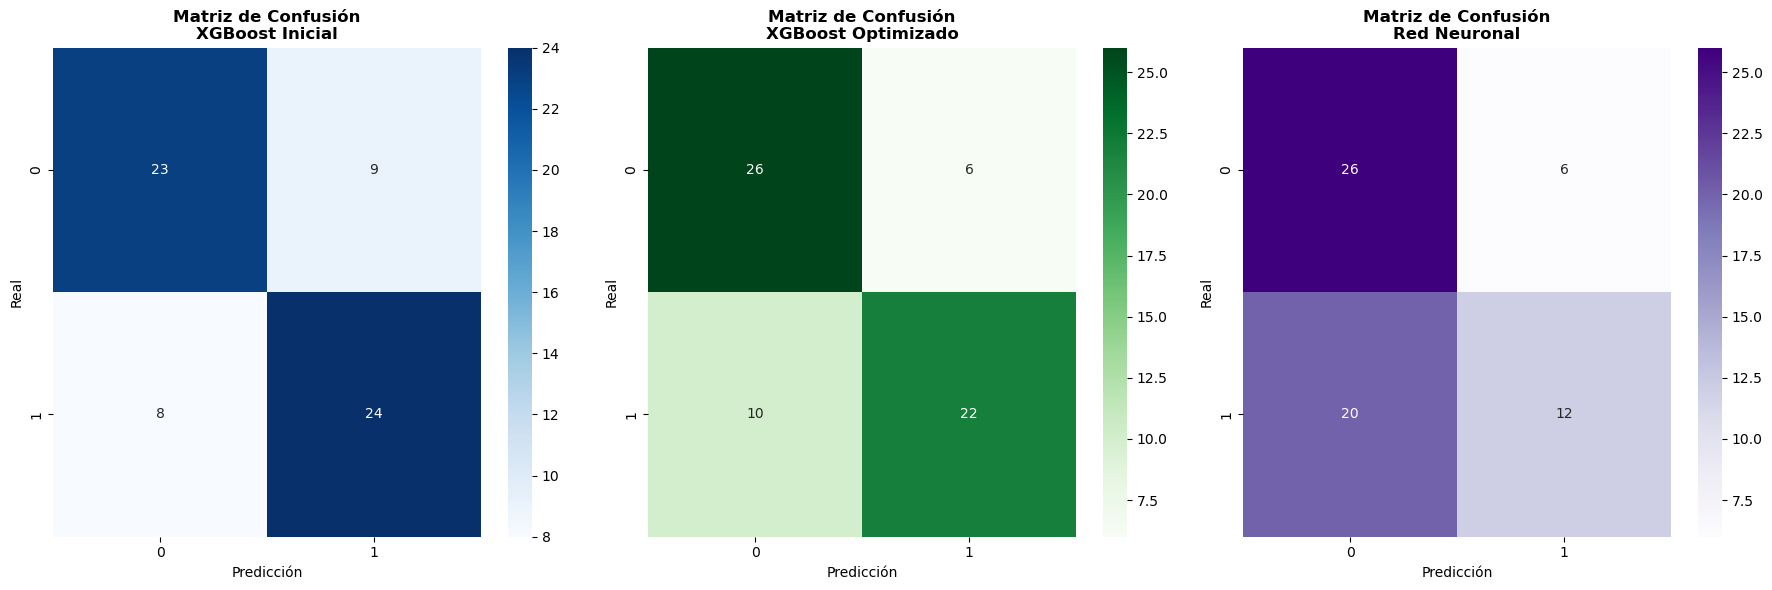

In [25]:
# === COMPARACIÓN EXHAUSTIVA DE MODELOS ===
print("COMPARACIÓN EXHAUSTIVA DE MODELOS")
print("=" * 55)

# Compilar todos los resultados
models_data = []

if xgb_available:
    models_data.extend([
        ['XGBoost Inicial', acc_xgb_initial, prec_xgb_initial, rec_xgb_initial, f1_xgb_initial, roc_auc_xgb_initial, balanced_accuracy_score(y_test_final, y_pred_xgb_initial)],
        ['XGBoost Optimizado', acc_xgb_best, prec_xgb_best, rec_xgb_best, f1_xgb_best, roc_auc_xgb_best, bal_acc_xgb_best]
    ])

if nn_available:
    models_data.append(['Red Neuronal', acc_nn, prec_nn, rec_nn, f1_nn, roc_auc_nn, bal_acc_nn])

if models_data:
    results_comparison = pd.DataFrame(models_data, columns=[
        'Modelo', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC', 'Balanced_Accuracy'
    ])
    
    print("\nTABLA DE RESULTADOS COMPARATIVA:")
    print(results_comparison.round(4))
    
    # Identificar el mejor modelo
    best_model_idx = results_comparison['F1_Score'].idxmax()
    best_model_name = results_comparison.loc[best_model_idx, 'Modelo']
    best_f1_score = results_comparison.loc[best_model_idx, 'F1_Score']
    
    print(f"\nMEJOR MODELO: {best_model_name}")
    print(f"F1-Score: {best_f1_score:.4f}")
    
    # Visualización comparativa
    if len(results_comparison) > 1:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Métricas principales
        metrics = ['Accuracy', 'Balanced_Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
        colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple', 'orange']
        
        for i, metric in enumerate(metrics):
            row = i // 3
            col = i % 3
            
            bars = axes[row, col].bar(results_comparison['Modelo'], 
                                     results_comparison[metric], 
                                     color=colors[i], alpha=0.8)
            axes[row, col].set_title(f'Comparación - {metric}', fontweight='bold')
            axes[row, col].set_ylabel(metric)
            axes[row, col].tick_params(axis='x', rotation=45)
            axes[row, col].set_ylim(0, 1.05)
            axes[row, col].grid(axis='y', alpha=0.3)
            
            # Agregar valores en las barras
            for bar, value in zip(bars, results_comparison[metric]):
                axes[row, col].text(bar.get_x() + bar.get_width()/2, 
                                   bar.get_height() + 0.01, 
                                   f'{value:.3f}', 
                                   ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    
    # Matrices de confusión comparativas
    if xgb_available and nn_available:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # XGBoost Inicial
        cm_xgb_initial = confusion_matrix(y_test_final, y_pred_xgb_initial)
        sns.heatmap(cm_xgb_initial, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title('Matriz de Confusión\nXGBoost Inicial', fontweight='bold')
        axes[0].set_xlabel('Predicción')
        axes[0].set_ylabel('Real')
        
        # XGBoost Optimizado
        cm_xgb_best = confusion_matrix(y_test_final, y_pred_xgb_best)
        sns.heatmap(cm_xgb_best, annot=True, fmt='d', cmap='Greens', ax=axes[1])
        axes[1].set_title('Matriz de Confusión\nXGBoost Optimizado', fontweight='bold')
        axes[1].set_xlabel('Predicción')
        axes[1].set_ylabel('Real')
        
        # Red Neuronal
        cm_nn = confusion_matrix(y_test_final, y_pred_nn)
        sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples', ax=axes[2])
        axes[2].set_title('Matriz de Confusión\nRed Neuronal', fontweight='bold')
        axes[2].set_xlabel('Predicción')
        axes[2].set_ylabel('Real')
        
        plt.tight_layout()
        plt.show()
        
else:
    print("No hay modelos disponibles para comparar")
    best_model_name = "Ninguno"
    best_f1_score = 0.0